# Microsoft Studio: Box Office Analysis
**Author:** James Pheby


<img src="images/neon.jpg" style="width: 700px;"/>

## Overview

Descriptive analysis of the last 15 years of box office profits to produce recommendations for Microsoft Studio on which type of movies it should produce, when it should produce it and what features the movies should include. 
-  Wait until the major markets have fully reopened after the pandemic lockdowns before releasing movies
-  Early blockbuster movies should be in the Action/Adventure/Sci-Fi genre, with lower budget movies in the Horror/Mystery/Thriller genre
-  The film studio should try and recruit Rose Byrne as lead actor and Jordan Peele as writer and director for the Horrow movies

## Business Problem

-  Maximise the likelihood of producing profitable movies for stakeholders

-  Make efficient use of budgets for the studio's debut movies

-  Recruit crew with a track record of producing profitable and acclaimed movies

-  Include features often associated with successful movies in the chosen genre

## Data Understanding
Data drawn from three sources:
-  Box office performance of more the 6,000 movies from The Numbers website
-  Genre, crew, and release date of each movie from Open Movie Database (OMDB). This also contains average user ratings from Rotten Tomatoes, Imdb and Metacritic 
-  Keywords attached to each movie from The Movie DB (TMDB)



In [1]:
from selenium import webdriver
from PIL import Image
import os
from os import path
import time
import random
import pandas as pd
import requests
import json
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import code.visualizations as viz
import code.data_preparation as dprep

<img src="images/reel.jpg" style="width: 700px;"/>

### OPEN LIST, DATAFRAMES & MOVIE METADATA DICTIONARY 

**ALL CONSTRUCTED FROM SCRAPING NUMBERS WEBSITE AND CALLING OMBD API**

* **financials_list** - all financial data from The Numbers website stored as a list of lists, with each list a movie
* **numbers_df** - a dataframe of the list of lists
* **financials_15_df** - numbers_df but filtered for movies in last 15 years only
* **omdb_attrs** - dictionary of movie metadata retrieved from OMDB website
* **attributes_df** - dataframe constructed from omdb_attrs

In [3]:
(financials_list, numbers_df, financials_15_df, omdb_attrs, attributes_df) = dprep.open_files()

In [4]:
financials_list[0:5]

[['Apr 23, 2019',
  'Avengers: Endgame',
  ' $400,000,000',
  ' $858,373,000',
  ' $2,797,800,564'],
 ['May 20, 2011',
  'Pirates of the Caribbean: On Stranger Tides',
  ' $379,000,000',
  ' $241,071,802',
  ' $1,045,713,802'],
 ['Apr 22, 2015',
  'Avengers: Age of Ultron',
  ' $365,000,000',
  ' $459,005,868',
  ' $1,395,316,979'],
 ['Dec 16, 2015',
  'Star Wars Ep. VII: The Force Awakens',
  ' $306,000,000',
  ' $936,662,225',
  ' $2,064,615,817'],
 ['Apr 25, 2018',
  'Avengers: Infinity War',
  ' $300,000,000',
  ' $678,815,482',
  ' $2,044,540,523']]

In [5]:
omdb_attrs

{'tt4154796': {'Actors': 'Robert Downey Jr., Chris Evans, Mark Ruffalo',
  'Director': 'Anthony Russo, Joe Russo',
  'Genre': 'Action, Adventure, Drama',
  'Plot': "After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe.",
  'Rated': 'PG-13',
  'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.4/10'},
   {'Source': 'Rotten Tomatoes', 'Value': '94%'},
   {'Source': 'Metacritic', 'Value': '78/100'}],
  'Runtime': '181 min',
  'Writer': 'Christopher Markus, Stephen McFeely, Stan Lee',
  'Title': 'Avengers: Endgame',
  'imdbRating': '8.4',
  'imdbVotes': '937,294',
  'RottenRating': '94',
  'MetacriticRating': '78',
  'Actor_List': ['Robert Downey Jr.', 'Chris Evans', 'Mark Ruffalo'],
  'Genre_List': ['Action', 'Adventure', 'Drama'],
  'Writer_List': ['Christopher Markus', 'Stephen McFeely', 'Stan Lee'],
  '

In [6]:
display(numbers_df.head(), numbers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5129 entries, 0 to 5128
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   5129 non-null   object 
 1   release_year            5129 non-null   int64  
 2   release_month           5106 non-null   object 
 3   release_day             5106 non-null   float64
 4   budget_$                5129 non-null   int64  
 5   domestic_box_office_$   5129 non-null   int64  
 6   worldwide_box_office_$  5129 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 280.6+ KB


title  release_year release_month  \
0                            Avengers: Endgame          2019           Apr   
1  Pirates of the Caribbean: On Stranger Tides          2011           May   
2                      Avengers: Age of Ultron          2015           Apr   
3         Star Wars Ep. VII: The Force Awakens          2015           Dec   
4                       Avengers: Infinity War          2018           Apr   

   release_day   budget_$  domestic_box_office_$  worldwide_box_office_$  
0         23.0  400000000              858373000              2797800564  
1         20.0  379000000              241071802              1045713802  
2         22.0  365000000              459005868              1395316979  
3         16.0  306000000              936662225              2064615817  
4         25.0  300000000              678815482              2044540523

None

In [8]:
display(financials_15_df.head(), financials_15_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 5127
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   imdb_code               2535 non-null   object 
 1   title                   2535 non-null   object 
 2   release_year            2535 non-null   int64  
 3   release_month           2535 non-null   object 
 4   release_day             2535 non-null   float64
 5   budget_$                2535 non-null   int64  
 6   domestic_box_office_$   2535 non-null   int64  
 7   worldwide_box_office_$  2535 non-null   int64  
 8   profit_loss_$           2535 non-null   int64  
 9   return_pct              2535 non-null   float64
 10  domestic_%              2535 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 237.7+ KB


imdb_code                                        title  release_year  \
0   No_code                            Avengers: Endgame          2019   
1   No_code  Pirates of the Caribbean: On Stranger Tides          2011   
2   No_code                      Avengers: Age of Ultron          2015   
3   No_code         Star Wars Ep. VII: The Force Awakens          2015   
4   No_code                       Avengers: Infinity War          2018   

  release_month  release_day   budget_$  domestic_box_office_$  \
0           Apr         23.0  400000000              858373000   
1           May         20.0  379000000              241071802   
2           Apr         22.0  365000000              459005868   
3           Dec         16.0  306000000              936662225   
4           Apr         25.0  300000000              678815482   

   worldwide_box_office_$  profit_loss_$  return_pct  domestic_%  
0              2797800564     2397800564  599.450141   30.680278  
1              1045713802      666713802  175.913932   23.053325  
2              1395316979     1030316979  282.278624   32.896172  
3              2064615817     1758615817  574.711051   45.367386  
4              2044540523     1744540523  581.513508   33.201371

None

In [9]:
display(attributes_df.head(), attributes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   imdb_code         2401 non-null   object 
 1   Genre_List        2401 non-null   object 
 2   Actor_List        2401 non-null   object 
 3   Director_List     2401 non-null   object 
 4   Writer_List       2401 non-null   object 
 5   Rated             2265 non-null   object 
 6   Run_Time          2401 non-null   float64
 7   MetacriticRating  2197 non-null   float64
 8   RottenRating      2211 non-null   float64
 9   imdbRating        2332 non-null   float64
 10  imdb_votes        2401 non-null   float64
 11  mean_rating       2164 non-null   float64
dtypes: float64(6), object(6)
memory usage: 225.2+ KB


imdb_code                    Genre_List  \
0  tt4154796    [Action, Adventure, Drama]   
1  tt1298650  [Action, Adventure, Fantasy]   
2  tt2395427   [Action, Adventure, Sci-Fi]   
3  tt4154756   [Action, Adventure, Sci-Fi]   
4  tt0449088  [Action, Adventure, Fantasy]   

                                          Actor_List  \
0     [Robert Downey Jr., Chris Evans, Mark Ruffalo]   
1          [Johnny Depp, Penélope Cruz, Ian McShane]   
2     [Robert Downey Jr., Chris Evans, Mark Ruffalo]   
3  [Robert Downey Jr., Chris Hemsworth, Mark Ruff...   
4      [Johnny Depp, Orlando Bloom, Keira Knightley]   

                Director_List  \
0  [Anthony Russo, Joe Russo]   
1              [Rob Marshall]   
2               [Joss Whedon]   
3  [Anthony Russo, Joe Russo]   
4            [Gore Verbinski]   

                                       Writer_List  Rated  Run_Time  \
0  [Christopher Markus, Stephen McFeely, Stan Lee]  PG-13     181.0   
1      [Ted Elliott, Terry Rossio, Stuart Beattie]  PG-13     136.0   
2              [Joss Whedon, Stan Lee, Jack Kirby]  PG-13     141.0   
3  [Christopher Markus, Stephen McFeely, Stan Lee]  PG-13     149.0   
4      [Ted Elliott, Terry Rossio, Stuart Beattie]  PG-13     169.0   

   MetacriticRating  RottenRating  imdbRating  imdb_votes  mean_rating  
0              78.0          94.0        84.0    937294.0    85.333333  
1              45.0          33.0        66.0    497245.0    48.000000  
2              66.0          76.0        73.0    788823.0    71.666667  
3              68.0          85.0        84.0    922928.0    79.000000  
4              50.0          44.0        71.0    613278.0    55.000000

None

<img src="images/screen.jpg" style="width: 700px;"/>

## Data Preparation

The worldwide box office takings for the last 15 years were cleaned, so they could be stored as integers.

Any films with corrupt data, often giving corrupt release date, was filtered out in the process. 

Any movie with a budget with less than $1m was filtered out, as it is either corrupted or anomalous, with the potential to skew the return on investment figures

Any movie with takings only outside the USA, or with no worldwide takings recorded were removed, as either corrupted or not relevant to the business problem

Any other null values were treated according to the analysis, and is explained in the code

We change any N/A empty ratings into NaN in order to make the mean_rating column numerical. We can leave those in as it is not a much used column, and when it is used, it is easy to deal with them in a way most appropriate to the anlaysis

Each movie released in the last 15 years was ranked using a combination of gross box office profit and return on investment, giving a way of comparing the performance of movies with different budgets

The best ranked movies were then analysed to find the most profitable genres

Within those genres, the movies were analysed to find which actors, directors and writers were most successful, and the runtime, release month and rating classifications most associated with hits



In [11]:
# make dataframe that only includes profitable films
financials_hits_df = financials_15_df.copy()
financials_hits_df = financials_hits_df[financials_hits_df['profit_loss_$'] > 0]

In [12]:
# do same but for flops
financials_flops_df = financials_15_df.copy()
financials_flops_df = financials_flops_df[financials_flops_df['profit_loss_$'] <= 0]

In [13]:
# make three joined dataframes, one for each financial dataframe. Fill any missing
# values in the categorical columns

def make_joined_dfs(financials_15_df, financials_hits_df, financials_flops_df, attributes_df):
    financial_attributes_join = financials_15_df.merge(attributes_df, how='left', on='imdb_code')
    financial_attributes_hits_join = financials_hits_df.merge(attributes_df, how='left', on='imdb_code')
    financial_attributes_flops_join = financials_flops_df.merge(attributes_df, how='left', on='imdb_code')
    
    financial_attributes_join.fillna({'Genre_List':'N/A', 'Actor_List':'N/A', 'Director_List': 'N/A', 'Writer_List': 'N/A', 'Rated': 'N/A'}, inplace=True)
    financial_attributes_hits_join.fillna({'Genre_List':'N/A', 'Actor_List':'N/A', 'Director_List': 'N/A', 'Writer_List': 'N/A', 'Rated': 'N/A'}, inplace=True)
    financial_attributes_flops_join.fillna({'Genre_List':'N/A', 'Actor_List':'N/A', 'Director_List': 'N/A', 'Writer_List': 'N/A', 'Rated': 'N/A'}, inplace=True)
    
    return(financial_attributes_join, financial_attributes_hits_join, financial_attributes_flops_join)

(financial_attributes_join, financial_attributes_hits_join, financial_attributes_flops_join) = dprep.make_joined_dfs(financials_15_df, financials_hits_df, financials_flops_df, attributes_df)


In [14]:
display(financial_attributes_join.head(), financial_attributes_join.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 0 to 2534
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   imdb_code               2535 non-null   object 
 1   title                   2535 non-null   object 
 2   release_year            2535 non-null   int64  
 3   release_month           2535 non-null   object 
 4   release_day             2535 non-null   float64
 5   budget_$                2535 non-null   int64  
 6   domestic_box_office_$   2535 non-null   int64  
 7   worldwide_box_office_$  2535 non-null   int64  
 8   profit_loss_$           2535 non-null   int64  
 9   return_pct              2535 non-null   float64
 10  domestic_%              2535 non-null   float64
 11  Genre_List              2535 non-null   object 
 12  Actor_List              2535 non-null   object 
 13  Director_List           2535 non-null   object 
 14  Writer_List             2535 non-null   

imdb_code                                        title  release_year  \
0   No_code                            Avengers: Endgame          2019   
1   No_code  Pirates of the Caribbean: On Stranger Tides          2011   
2   No_code                      Avengers: Age of Ultron          2015   
3   No_code         Star Wars Ep. VII: The Force Awakens          2015   
4   No_code                       Avengers: Infinity War          2018   

  release_month  release_day   budget_$  domestic_box_office_$  \
0           Apr         23.0  400000000              858373000   
1           May         20.0  379000000              241071802   
2           Apr         22.0  365000000              459005868   
3           Dec         16.0  306000000              936662225   
4           Apr         25.0  300000000              678815482   

   worldwide_box_office_$  profit_loss_$  return_pct  ...  Actor_List  \
0              2797800564     2397800564  599.450141  ...         N/A   
1              1045713802      666713802  175.913932  ...         N/A   
2              1395316979     1030316979  282.278624  ...         N/A   
3              2064615817     1758615817  574.711051  ...         N/A   
4              2044540523     1744540523  581.513508  ...         N/A   

  Director_List Writer_List Rated Run_Time MetacriticRating  RottenRating  \
0           N/A         N/A   N/A      NaN              NaN           NaN   
1           N/A         N/A   N/A      NaN              NaN           NaN   
2           N/A         N/A   N/A      NaN              NaN           NaN   
3           N/A         N/A   N/A      NaN              NaN           NaN   
4           N/A         N/A   N/A      NaN              NaN           NaN   

   imdbRating  imdb_votes  mean_rating  
0         NaN         NaN          NaN  
1         NaN         NaN          NaN  
2         NaN         NaN          NaN  
3         NaN         NaN          NaN  
4         NaN         NaN          NaN  

[5 rows x 22 columns]

None

**DATAFRAMES** <br><br>
* **numbers_df** - a dataframe of the list of lists
* **financials_15_df** - numbers_df but filtered for movies in last 15 years only
* **attributes_df** - dataframe constructed from omdb movie metadata
* **financials_hits_df** - same data but only including profitable movies <br>
* **financials_flops_df** - same data but only including loss-making movies <br>
<br>

**JOINED**

* **financial_attributes_join** - all financial data joined with attributes
* **financial_attributes_hits_join** - hits financial data joined with attributes <br>
* **financial_attributes_flops_join** - flops financial data joined with attributes <br>

## Data Analysis

### How have the mean takings per movie changed over the last 15 years?

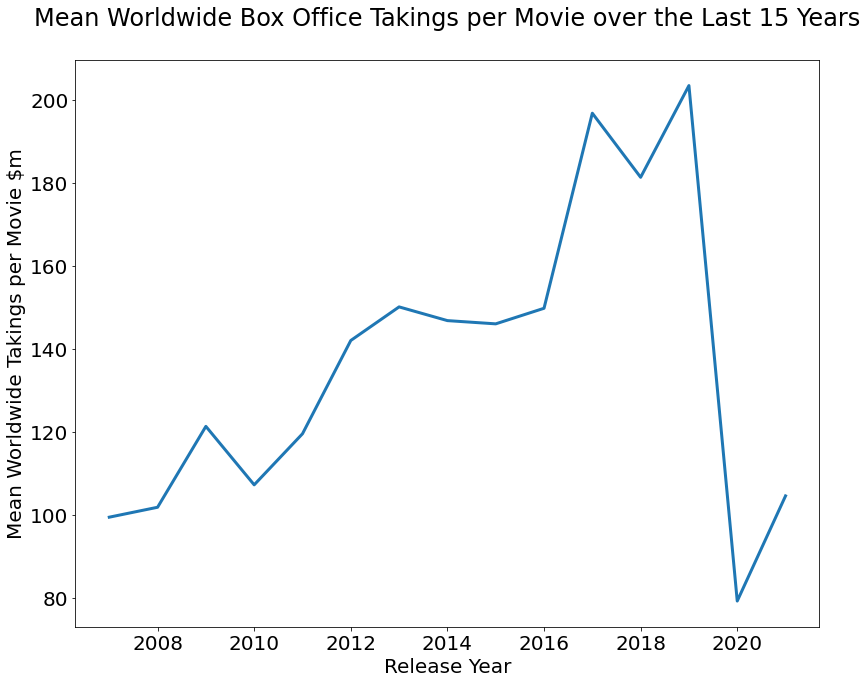

In [8]:
ww_df = financial_attributes_join.groupby('release_year').mean()
ww_df['worldwide_box_office_$'] = ww_df['worldwide_box_office_$']/1000000
ww_df = ww_df[:15]

In [ ]:
def lineplotter(df, x_col, y_col, title, x_lab, y_lab, file, h=None, log=None):
    '''takes in df, and its columns to create lineplot'''
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.set_context('poster')
    ax = sns.lineplot(data=df, x=x_col, y=y_col, hue=h)
    plt.title(title, y=1.05)
    plt.xlabel(x_lab, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel(y_lab, fontsize=20)
    fig.tight_layout()
    if log=='y':
        ax.set_yscale('log')
    if h=='variable':
        plt.legend(loc='lower left', title='Genre')
    plt.savefig(file);
    return ax
    

In [ ]:
lineplotter(ww_df, "release_year", "worldwide_box_office_$", 'Mean Worldwide Box Office Takings per Movie over the Last 15 Years', 'Release Year', 'Mean Worldwide Takings per Movie $m', 'images/worldwide_bo.png');

* <font color='red'>**Despite a steady rise since 2007, mean takings per movie in the worldwide market fell more than 50% during lockdown, and have only just started to recover**</font> 

In [15]:
display(ww_df, ww_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 2007 to 2021
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   release_day             15 non-null     float64
 1   budget_$                15 non-null     float64
 2   domestic_box_office_$   15 non-null     float64
 3   worldwide_box_office_$  15 non-null     float64
 4   profit_loss_$           15 non-null     float64
 5   return_pct              15 non-null     float64
 6   domestic_%              15 non-null     float64
 7   Run_Time                15 non-null     float64
 8   MetacriticRating        15 non-null     float64
 9   RottenRating            15 non-null     float64
 10  imdbRating              15 non-null     float64
 11  imdb_votes              15 non-null     float64
 12  mean_rating             15 non-null     float64
dtypes: float64(13)
memory usage: 1.6 KB


release_day      budget_$  domestic_box_office_$  \
release_year                                                     
2007            15.700535  3.730818e+07           4.343211e+07   
2008            16.085714  3.824066e+07           4.453360e+07   
2009            16.319149  4.131234e+07           5.309010e+07   
2010            16.082192  3.995917e+07           4.535840e+07   
2011            16.090452  4.184221e+07           4.739218e+07   
2012            15.989189  4.470108e+07           5.601152e+07   
2013            16.976048  4.967156e+07           6.007259e+07   
2014            16.208092  4.376474e+07           5.842969e+07   
2015            16.211640  4.288066e+07           5.594330e+07   
2016            15.521277  4.698574e+07           5.772021e+07   
2017            16.707143  5.445429e+07           7.476807e+07   
2018            14.476510  4.704631e+07           7.240641e+07   
2019            14.463768  5.337319e+07           7.674920e+07   
2020            18.214286  4.412133e+07           2.883459e+07   
2021            13.655172  5.947147e+07           4.470214e+07   

              worldwide_box_office_$  profit_loss_$  return_pct  domestic_%  \
release_year                                                                  
2007                       99.435397   6.212722e+07  177.824829   54.284253   
2008                      101.824860   6.358420e+07  168.255174   53.997027   
2009                      121.306378   7.999404e+07  152.944034   54.633900   
2010                      107.226743   6.726758e+07  185.898128   51.442181   
2011                      119.526123   7.768391e+07  198.695454   49.195103   
2012                      141.988424   9.728734e+07  243.560976   46.562691   
2013                      150.077362   1.004058e+08  250.358318   49.589984   
2014                      146.775015   1.030103e+08  299.130707   49.681335   
2015                      145.994017   1.031134e+08  216.822084   46.908334   
2016                      149.744582   1.027588e+08  255.503219   50.873289   
2017                      196.724876   1.422706e+08  339.137807   51.553932   
2018                      181.285722   1.342394e+08  305.908541   54.862703   
2019                      203.372723   1.499995e+08  286.230578   54.069515   
2020                       79.243798   3.512247e+07  185.069726   55.751309   
2021                      104.560556   4.508908e+07   96.530780   50.624223   

                Run_Time  MetacriticRating  RottenRating  imdbRating  \
release_year                                                           
2007          104.513369         56.190476     53.890244   65.750000   
2008          101.423810         50.746114     48.762626   62.640777   
2009          101.638298         53.171598     51.660920   63.456044   
2010          100.812785         53.937500     52.959184   63.839623   
2011          102.105528         53.918919     54.578378   63.166667   
2012          100.994595         54.868750     54.104294   64.454545   
2013          105.479042         54.255034     53.889610   64.981595   
2014          106.497110         53.500000     53.618182   64.583333   
2015          105.455026         54.323529     55.924855   64.945355   
2016          105.420213         55.068966     57.694915   64.683060   
2017          109.685714         56.088235     58.160584   64.586957   
2018          109.899329         55.265306     57.641379   63.743243   
2019          105.782609         55.817460     60.869919   65.269231   
2020          104.476190         53.875000     59.277778   61.690476   
2021          102.379310         56.720000     57.333333   64.777778   

                 imdb_votes  mean_rating  
release_year                              
2007          124961.839572    58.858025  
2008          130190.633333    53.893543  
2009          125637.244681    56.303748  
2010          123890.255708    56.982363  
2011          135884.185930    57.315118  
2012          154814.

None

### Which genres produced films with the highest mean profit?

In [8]:
genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'profit_loss_$', financial_attributes_join, genre_filter=None)
genre_profit_df.head()

Genre_List  release_year  release_day    budget_$  domestic_box_office_$  \
0  Adventure   2013.646630    15.719490  101.787460             122.764076   
1  Animation   2013.443820    15.825843   89.230145             121.617770   
2     Sci-Fi   2013.381443    14.804124   91.678725             114.860198   
3    Musical   2012.294118    16.588235   48.108824              80.329484   
4     Action   2013.437126    16.255988   79.161532              88.665190   

   worldwide_box_office_$  profit_loss_$  return_pct  domestic_%    Run_Time  \
0              348.066914     246.279454  229.833362   40.303792  109.355191   
1              329.862920     240.632775  265.739632   40.405044   90.898876   
2              312.081079     220.402354  248.374968   42.570276  110.974227   
3              218.642418     170.533595  219.293507   53.723431  118.176471   
4              239.971669     160.810137  181.105641   43.536116  111.901198   

   MetacriticRating  RottenRating  imdbRating     imdb_votes  mean_rating  \
0         54.574906     56.193246   64.352190  219327.167577    58.398606   
1         58.218935     63.401198   65.514286  133957.696629    62.333333   
2         52.865591     53.129032   64.057592  284189.298969    56.704505   
3         52.800000     52.000000   61.705882   95704.588235    54.948718   
4         51.266564     50.870769   63.957895  205891.016467    55.336463   

   Counts  
0   549.0  
1   178.0  
2   194.0  
3    17.0  
4   668.0

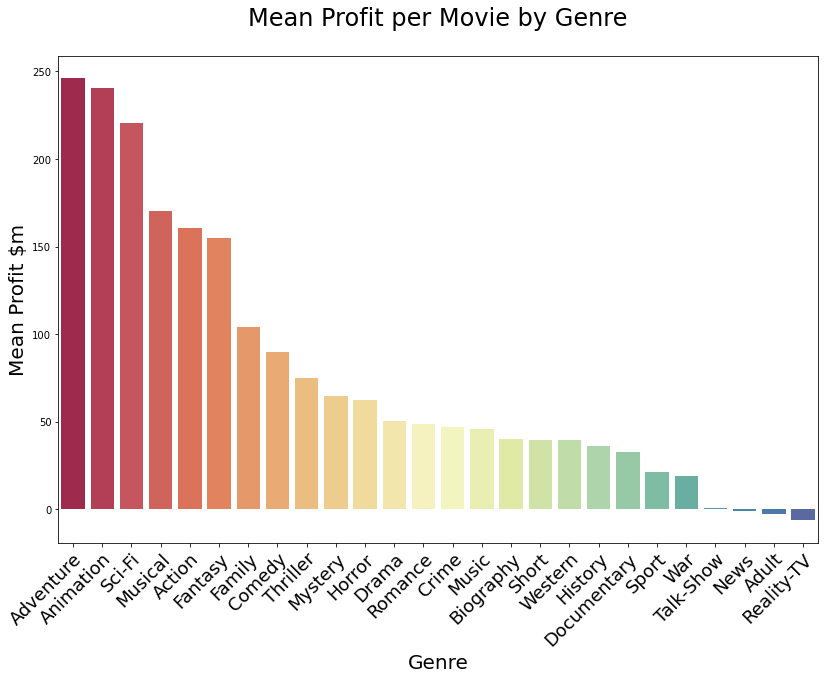

In [9]:
viz.seaborn_bar(genre_profit_df, 'Genre_List', 'profit_loss_$', 'Genre', 'Mean Profit $m', 'Mean Profit per Movie by Genre', 'images/profit_v_genre.png');

* <font color='red'>**On average, Adventure, Animation and Sci-Fi produced the most profitable films over the last 15
    years**</font> 

### Which genres produced films with the highest percentage return on investment (ROI)?

In [21]:
genre_roi_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'return_pct', financial_attributes_join, genre_filter=None)
genre_roi_df.head()

Genre_List  release_year  release_day   budget_$  domestic_box_office_$  \
0     Horror   2013.359649    15.780702  20.354825              37.022350   
1    Mystery   2012.963303    15.646789  25.223213              39.779676   
2   Thriller   2012.876404    16.584270  34.318870              43.027255   
3  Animation   2013.443820    15.825843  89.230145             121.617770   
4     Sci-Fi   2013.381443    14.804124  91.678725             114.860198   

   worldwide_box_office_$  profit_loss_$  return_pct  domestic_%    Run_Time  \
0               82.600689      62.245864  561.317947   51.253194   97.254386   
1               89.913659      64.690446  506.722270   47.795347  106.018349   
2              109.213483      74.894613  331.864104   48.842276  106.255618   
3              329.862920     240.632775  265.739632   40.405044   90.898876   
4              312.081079     220.402354  248.374968   42.570276  110.974227   

   MetacriticRating  RottenRating  imdbRating     imdb_votes  mean_rating  \
0         47.433180     45.518349   57.858407   97053.451754    50.479070   
1         52.156398     50.500000   62.509174  141854.752294    55.063796   
2         50.918367     48.901734   62.112676  143584.087079    54.260570   
3         58.218935     63.401198   65.514286  133957.696629    62.333333   
4         52.865591     53.129032   64.057592  284189.298969    56.704505   

   Counts  
0   228.0  
1   218.0  
2   356.0  
3   178.0  
4   194.0

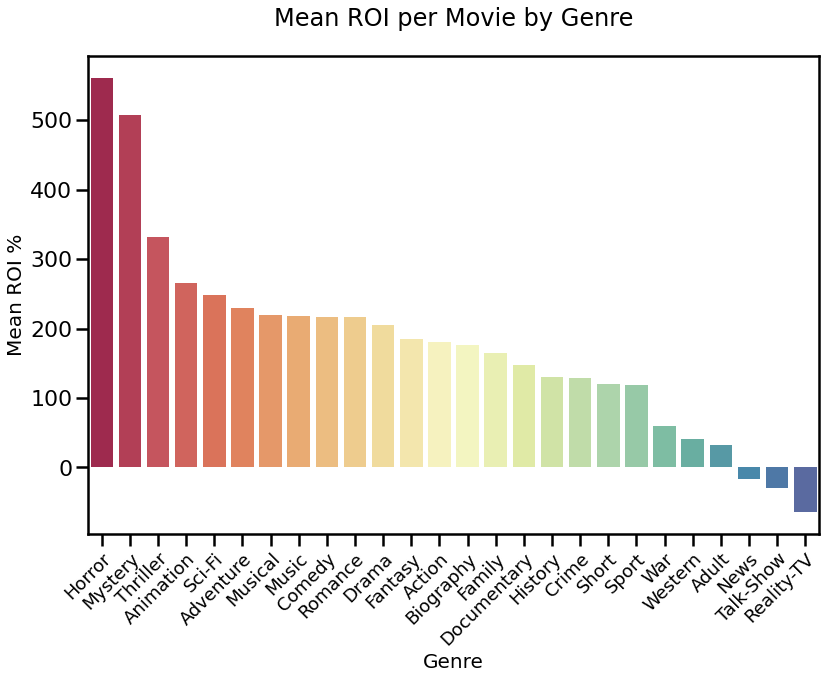

In [22]:
viz.seaborn_bar(genre_roi_df, 'Genre_List', 'return_pct', 'Genre', 'Mean ROI %', 'Mean ROI per Movie by Genre', 'images/ROI_v_genre.png');

* <font color='red'>**On average, Horror, Mystery and Thriller movies produced highest return on investment over the last 15 years**</font> 

### What was the average budget for movies by genre?

In [19]:
genre_budget_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'budget_$', financial_attributes_join, genre_filter=None)
genre_budget_df.head()

Genre_List  release_year  release_day    budget_$  domestic_box_office_$  \
0  Adventure   2013.646630    15.719490  101.787460             122.764076   
1     Sci-Fi   2013.381443    14.804124   91.678725             114.860198   
2  Animation   2013.443820    15.825843   89.230145             121.617770   
3     Action   2013.437126    16.255988   79.161532              88.665190   
4    Fantasy   2012.791262    15.271845   78.347913              78.408695   

   worldwide_box_office_$  profit_loss_$  return_pct  domestic_%    Run_Time  \
0              348.066914     246.279454  229.833362   40.303792  109.355191   
1              312.081079     220.402354  248.374968   42.570276  110.974227   
2              329.862920     240.632775  265.739632   40.405044   90.898876   
3              239.971669     160.810137  181.105641   43.536116  111.901198   
4              233.081236     154.733323  184.762462   42.788055  110.199029   

   MetacriticRating  RottenRating  imdbRating     imdb_votes  mean_rating  \
0         54.574906     56.193246   64.352190  219327.167577    58.398606   
1         52.865591     53.129032   64.057592  284189.298969    56.704505   
2         58.218935     63.401198   65.514286  133957.696629    62.333333   
3         51.266564     50.870769   63.957895  205891.016467    55.336463   
4         48.795000     45.904040   60.980488  168564.432039    51.887205   

   Counts  
0   549.0  
1   194.0  
2   178.0  
3   668.0  
4   206.0

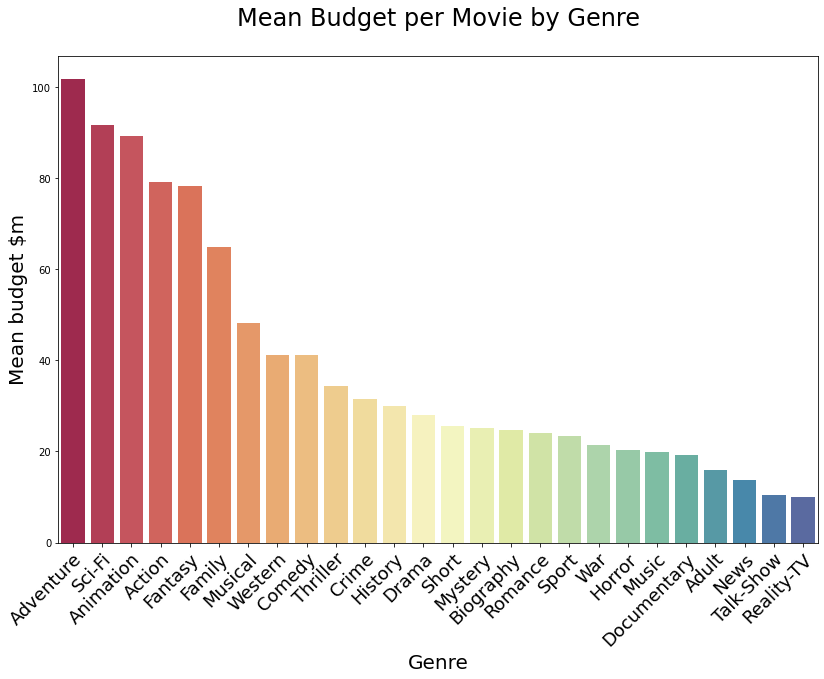

In [20]:
viz.seaborn_bar(genre_budget_df, 'Genre_List', 'budget_$', 'Genre', 'Mean budget $m', 'Mean Budget per Movie by Genre', 'images/budget_v_genre.png');

* <font color='red'>**On average, Adventure, Sci-Fi, Animation and Action movies had the highest budgets over the last 15 years. Of the major genres, Horror, Drama, and Thriller movies had low budgets**</font> 

### How many hits and flops were produced in each genre?

In [8]:
filtered_concat_gen_df = dprep.make_profit_loss_df(financial_attributes_join, financial_attributes_flops_join, financial_attributes_hits_join)

Genre_List  All_Counts  Flop_Counts  Hit_Counts  Percent_Hits
0   Adventure       549.0         82.0       467.0     85.063752
1      Action       668.0        143.0       525.0     78.592814
2     Fantasy       206.0         49.0       157.0     76.213592
3      Comedy       860.0        199.0       661.0     76.860465
4    Thriller       356.0         85.0       271.0     76.123596
5     Mystery       218.0         50.0       168.0     77.064220
6      Horror       228.0         45.0       183.0     80.263158
7       Drama      1164.0        393.0       771.0     66.237113
8     Romance       319.0         89.0       230.0     72.100313
9       Crime       385.0        130.0       255.0     66.233766
10  Biography       229.0         82.0       147.0     64.192140

In [ ]:
def grouped_bar_genre(filtered_concat_gen_df):
    
    labels = filtered_concat_gen_df['Genre_List'].to_list()
    flop_count = filtered_concat_gen_df['Flop_Counts'].to_list()
    hit_count = filtered_concat_gen_df['Hit_Counts'].to_list()
    percentage = filtered_concat_gen_df['Percent_Hits'].to_list()

    x = np.arange(len(labels))  # the label locations
    width = 0.4  # the width of the bar

    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    fig.suptitle(f'Bar Charts of Flops and Hits by Genre', y=1.05, fontsize=22)

    rects1 = ax[0].barh(x + width/2, flop_count, width, label='Flops')
    rects2 = ax[0].barh(x - width/2, hit_count, width, label='Hits')

    ax[0].set_xlabel('Scores', fontsize =17)
    ax[0].set_title('Number of Hits and Flops by Genre', fontsize = 20, y = 1.03)
    ax[0].set_yticks(x)
    ax[0].set_yticklabels(labels, fontsize=17)
    ax[0].legend()
    
    width1=0.8
    rects3 = ax[1].barh(x, percentage, width1, color='red')
    ax[1].set_xlabel('Percentage of Hits', fontsize =17)
    ax[1].set_title('Percentage of Hits by Genre', fontsize = 20, y = 1.03)
    ax[1].set_yticks(x)
    ax[1].set_yticklabels(labels, fontsize=17)

    plt.savefig(f'images/flops_v_hits.png', bbox_inches = "tight")
    plt.show()
    

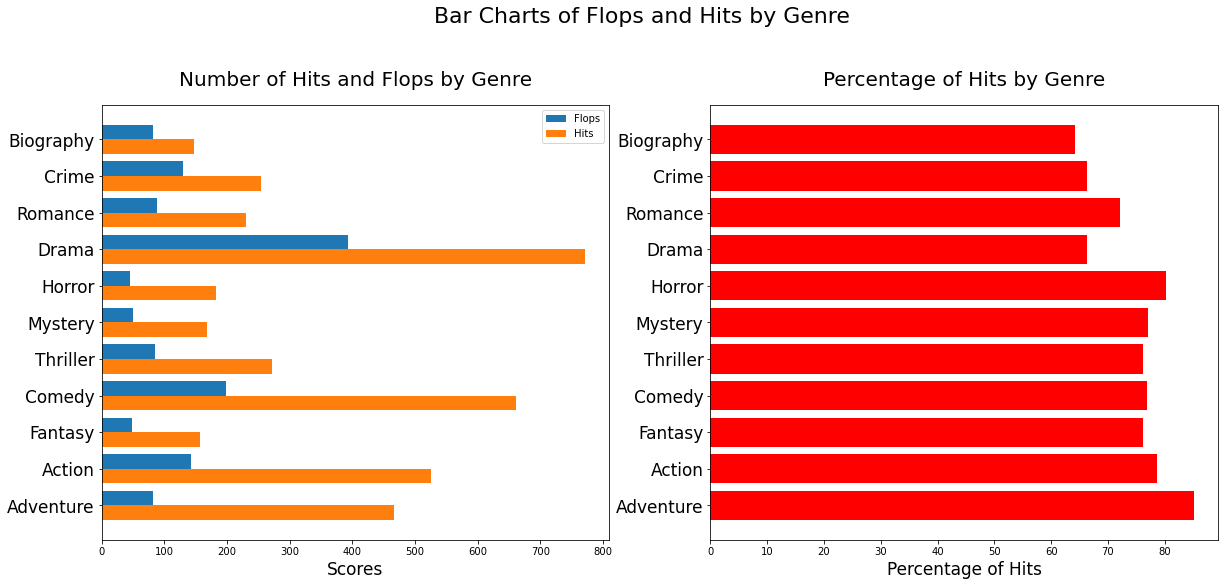

In [9]:
grouped_bar_genre(filtered_concat_gen_df)

* <font color='red'>**Drama, Comedy, Action and Adventure genres prodeced the most movies** <br>
* **Movies in the Adventure, Horror, Comedy and Thriller genres we the ones most likley to make a profit**</font> 


### What has been the spread of profits/losses in each genre?

In [ ]:
def profit_box_plot(financial_attributes_join):
    genre_count = financial_attributes_join.explode('Genre_List')
    both_dic ={}
    for index, row in genre_count.iterrows():
        key = row['Genre_List']
        if key not in both_dic:
            both_dic[key] = []
        both_dic[key].append(row['profit_loss_$']/1000000)
            
    bp_dic = {k:v for k, v in both_dic.items() if len(v)>200}
    labels, data = [*zip(*bp_dic.items())] 
    sns.set_context('poster')
    sns.set_style("whitegrid")
    f, ax = plt.subplots(figsize=(15, 9))
    ax.set_yscale("symlog")
    sns.boxplot(data = data)
    plt.xticks(range(0, len(labels)), labels, rotation = 0, fontsize=17)
    plt.tick_params(axis="x", labelsize=17)
    plt.xlabel('Genre', fontsize=20)
    plt.ylabel('Profit/Loss $m', fontsize=19)
    plt.title('Profit/Loss Spread Using Every Film in each Genre', y = 1.03, fontsize=20)
    plt.savefig(f'images/genre-pl-boxplot.png')
    #fig.tight_layout()
    plt.show();

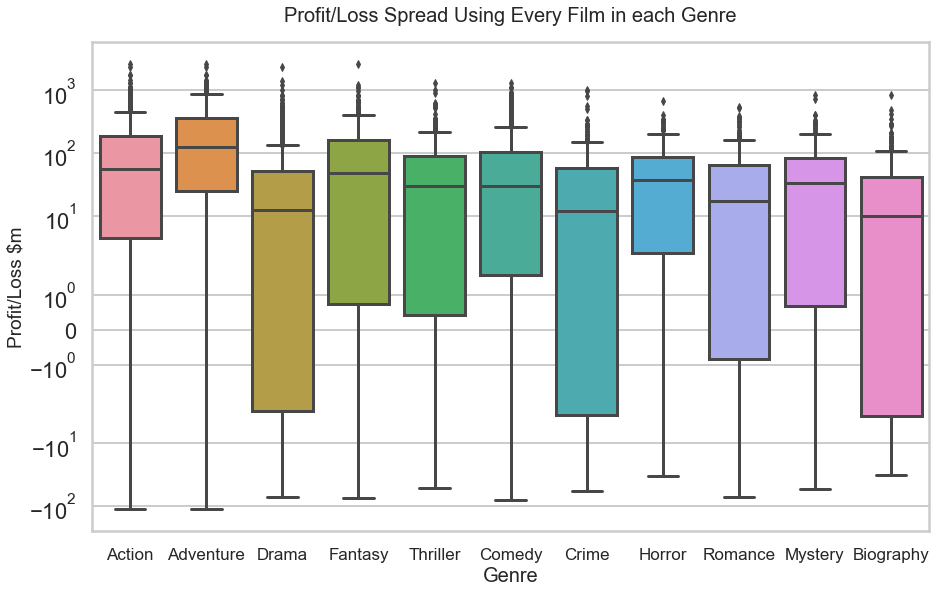

In [24]:
profit_box_plot(financial_attributes_join)

* <font color='red'> **Movies in the Action and Adventure, genres saw the highest median profits, but also sustained the heaviest losses**<br>
* **Horror, Biography, Thriller and Mystery movies sustained the lightest losses, with Thriller, Horror and Mystery movies also having high median profits**</font> 

* <font color='red'> **THE STUDIO SHOULD FOCUS ON HIGH BUDGET ADVENTURE MOVIES AND LOWER BUDGET HORROR MOVIES**<br>
* **WE NOW NEED TO ANALYSE WHAT TYPE OF MOVIES IN EACH OF THESE GENRES HAVE BEEN MOST PROFITABLE**</font> 

### Which subgenre within the Adventure genre has produced the movies with the highest mean profits?

<img src="images/space_shuttle.jpg" style="width: 700px;"/>

In [26]:
adventure_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure'])
adventure_genre_profit_df.head()

Genre_List  release_year  release_day    budget_$  domestic_box_office_$  \
0     Sci-Fi   2013.951807    15.385542  151.214458             200.136689   
1   Thriller   2014.000000    16.000000  118.961905             128.244745   
2     Action   2013.858586    15.804714  119.658302             138.992516   
3  Animation   2013.673077    16.211538   96.799780             132.423288   
4    Fantasy   2013.457447    15.617021  117.473404             119.610795   

   worldwide_box_office_$  profit_loss_$  return_pct  domestic_%    Run_Time  \
0              551.325479     400.111022  257.667481   37.877397  123.963855   
1              460.643327     341.681422  254.932951   32.202528  120.142857   
2              399.431376     279.773074  218.746822   37.440807  116.471380   
3              362.406953     265.607172  284.822825   39.581313   93.724359   
4              379.646661     262.173257  204.484892   37.971552  116.191489   

   MetacriticRating  RottenRating  imdbRating     imdb_votes  mean_rating  \
0         55.256098     57.132530   66.329268  423626.855422    59.597561   
1         57.200000     61.714286   66.333333  259639.809524    61.683333   
2         52.903780     53.565517   64.537162  273665.531987    56.881119   
3         57.477124     62.370861   65.339744  145100.724359    61.682222   
4         49.032967     45.640449   60.617021  240689.446809    51.816479   

   Counts  
0    83.0  
1    21.0  
2   297.0  
3   156.0  
4    94.0

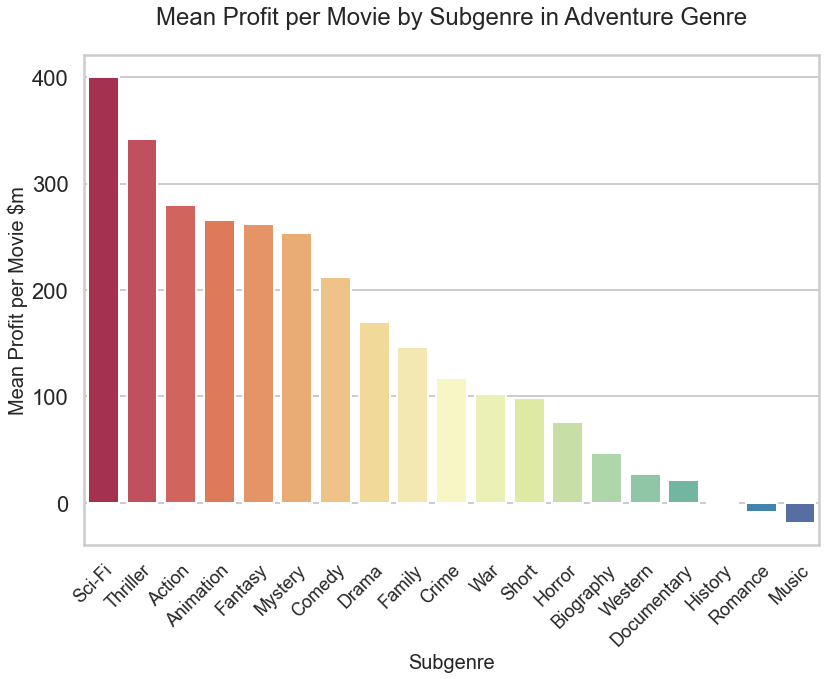

In [27]:
viz.seaborn_bar(adventure_genre_profit_df, 'Genre_List', 'profit_loss_$', 'Subgenre', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Subgenre in Adventure Genre', 'images/ad_budget_v_genre.png');

* <font color='red'> **Sci-Fi was the most profitable subgenre in the Adventure genre**</font> 

### Which subgenre within the Adventure/Sci-Fi genre has produced the movies with the highest mean profits?

In [28]:
adventure_scifi_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi'])
adventure_scifi_genre_profit_df.head()

Genre_List  release_year  release_day    budget_$  domestic_box_office_$  \
0     Action    2014.09589    15.369863  163.393151             215.118949   
1      Drama    2012.25000    15.250000   99.000000             175.386976   
2    Mystery    2012.00000    30.000000  125.000000             126.477084   
3      Short    2010.00000    17.000000  200.000000             172.062763   
4     Comedy    2010.00000    21.666667   83.166667              69.863621   

   worldwide_box_office_$  profit_loss_$  return_pct  domestic_%    Run_Time  \
0              591.804488     428.411337  270.611927   35.608537  125.561644   
1              501.997453     402.997453  328.618289   50.552600  127.000000   
2              402.448265     277.448265  221.958612   31.426917  124.000000   
3              399.866199     199.866199   99.933099   43.030084    3.000000   
4              167.049420      83.882753   51.367016   58.670582   65.666667   

   MetacriticRating  RottenRating  imdbRating     imdb_votes  mean_rating  \
0         54.638889      57.09589   66.166667  425124.479452    59.328704   
1         76.250000      79.25000   76.500000  805332.750000    77.333333   
2         64.000000      73.00000   70.000000  584095.000000    69.000000   
3               NaN      51.00000         NaN       0.000000          NaN   
4         42.500000      47.00000   66.000000   84830.333333    51.166667   

   Counts  
0    73.0  
1     4.0  
2     1.0  
3     1.0  
4     3.0

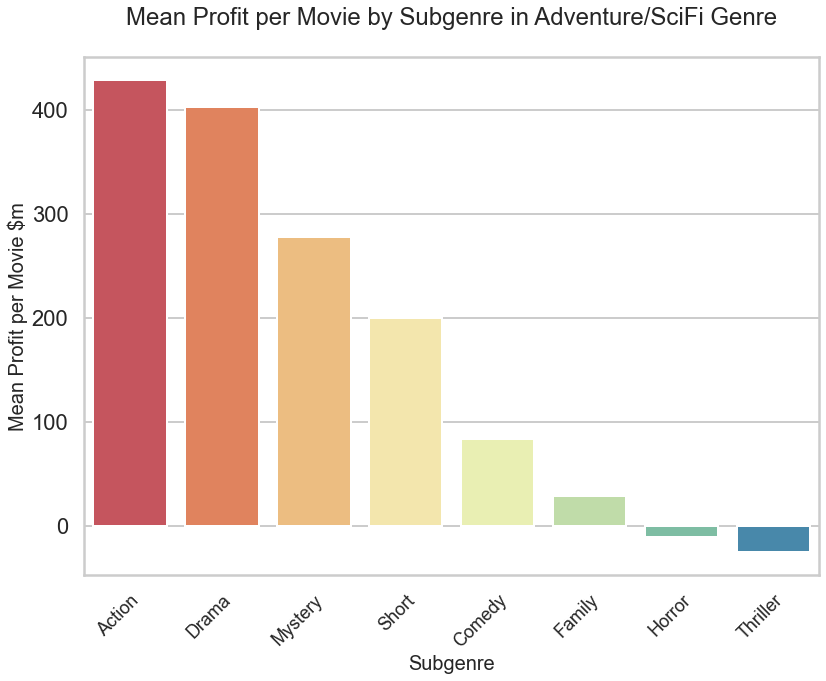

In [29]:
viz.seaborn_bar(adventure_scifi_genre_profit_df, 'Genre_List', 'profit_loss_$', 'Subgenre', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Subgenre in Adventure/SciFi Genre', 'images/ad_scifi_budget_v_genre.png');

* <font color='red'> **Action was the most profitable subgenre in the Adventure/Sci-Fi genre**</font> 

### Which budgets have produced the most profitable movies within the Adventure/Sci-Fi/Action genre?

In [30]:
add_adventure_list=[]
for index, row in financial_attributes_join.iterrows():
    if 'Adventure' in row['Genre_List']:
        add_adventure_list.append(row)
adventure_all = pd.DataFrame(add_adventure_list)
adventure_all_s = dprep.budget_prep(adventure_all, 'adventure')
adventure_all_s


imdb_code                                 title  release_year  \
20   tt0499549                                Avatar          2009   
0    tt4154796                     Avengers: Endgame          2019   
3    tt2488496  Star Wars Ep. VII: The Force Awakens          2015   
4    tt4154756                Avengers: Infinity War          2018   
31   tt0369610                        Jurassic World          2015   
..         ...                                   ...           ...   
439  tt4199898                             PLAYMOBIL          2019   
248  tt3095734                        Monster Trucks          2016   
64   tt7146812                                Onward          2020   
321  tt2076822                         Chaos Walking          2021   
186  tt1305591                       Mars Needs Moms          2011   

    release_month  release_day  budget_$  domestic_box_office_$  \
20            Dec           17     237.0              760507625   
0             Apr           23     400.0              858373000   
3             Dec           16     306.0              936662225   
4             Apr           25     300.0              678815482   
31            Jun            9     215.0              652306625   
..            ...          ...       ...                    ...   
439           Aug            7      75.0                1115008   
248           Dec           29     125.0               33370166   
64            Feb           28     200.0               61555145   
321           Feb            3     100.0               13287908   
186           Mar           11     150.0               21392758   

     worldwide_box_office_$  profit_loss_$   return_pct  ...  \
20               2845899541    2608.899541  1100.801494  ...   
0                2797800564    2397.800564   599.450141  ...   
3                2064615817    1758.615817   574.711051  ...   
4                2044540523    1744.540523   581.513508  ...   
31               1669979967    1454.979967   676.734868  ...   
..                      ...            ...          ...  ...   
439                16288031     -58.711969   -78.282625  ...   
248                61642798     -63.357202   -50.685762  ...   
64                133308053     -66.691947   -33.345973  ...   
321                26943020     -73.056980   -73.056980  ...   
186                39549758    -110.450242   -73.633495  ...   

                  Director_List  \
20              [James Cameron]   
0    [Anthony Russo, Joe Russo]   
3                 [J.J. Abrams]   
4    [Anthony Russo, Joe Russo]   
31            [Colin Trevorrow]   
..                          ...   
439              [Lino DiSalvo]   
248               [Chris Wedge]   
64                [Dan Scanlon]   
321                [Doug Liman]   
186               [Simon Wells]   

                                           Writer_List  Rated Run_Time  \
20                                     [James Cameron]  PG-13    162.0   
0      [Christopher Markus, Stephen McFeely, Stan Lee]  PG-13    181.0   
3        [Lawrence Kasdan, J.J. Abrams, Michael Arndt]  PG-13    138.0   
4      [Christopher Markus, Stephen McFeely, Stan Lee]  PG-13    149.0   
31        [Rick Jaffa, Amanda Silver, Colin Trevorrow]  PG-13    124.0   
..                                                 ...    ...      ...   
439   [Michael LaBash, Lino DiSalvo, Blaise Hemingway]     PG     99.0   
248  [Derek Connolly, Matthew Robinson, Jonathan Ai...     PG    104.0   
64           [Dan Scanlon, Keith Bunin, Jason Headley]     PG    102.0   
321                   [Patrick Ness, Christopher Ford]  PG-13    109.0   
186      [Simon Wells, Wendy Wells, Berkeley Breathed]     PG     88.0   

    MetacriticRating RottenRating  imdbRating  imdb_votes  mean_rating  \
20              83.0         81.0        78.0   1155483.0    80.666667   
0               78.0         94.0        84.0    937294.0    85.333333   
3               80.0         93.0        78.0    884789.0 

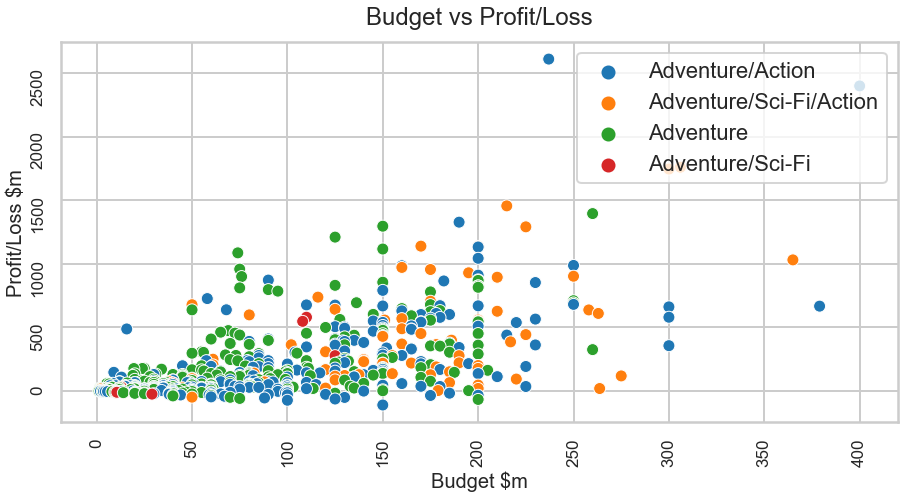

In [31]:
viz.budget_sub_scatter(adventure_all_s, 'adventure')

* <font color='red'> **The highest profits have generally been generated from budgets of between 150 and 250 million dollars**</font> 

### Which actor has been most profitable within the Adventure/Sci-Fi/Action genre?

In [10]:
adventure_sub_actor_profit_df = dprep.feature_v_financialMean_df_maker('Actor_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_actor_profit_df = adventure_sub_actor_profit_df[adventure_sub_actor_profit_df['Counts'] >1]
adventure_sub_actor_profit_df

Actor_List  release_year  release_day    budget_$  \
4             Mark Ruffalo   2016.500000    23.500000  332.500000   
5              Chris Pratt   2016.500000     7.500000  192.500000   
6      Bryce Dallas Howard   2016.500000     7.500000  192.500000   
13             John Boyega   2016.500000    16.000000  230.500000   
14       Robert Downey Jr.   2013.714286    15.428571  238.714286   
19             Tom Holland   2018.000000    16.000000  167.500000   
20             Chris Evans   2013.600000    23.800000  230.000000   
23      Scarlett Johansson   2015.750000    20.500000  211.250000   
25            Shia LaBeouf   2009.000000    18.333333  185.333333   
26          Ben Mendelsohn   2018.500000    13.000000  162.500000   
30           Mark Wahlberg   2015.500000    22.500000  213.500000   
34               Megan Fox   2008.000000    13.000000  180.500000   
35         Josh Hutcherson   2013.666667    15.000000  121.666667   
39       Samuel L. Jackson   2014.200000    19.400000  145.500000   
46               Amy Adams   2014.500000    18.500000  244.000000   
47            Henry Cavill   2014.500000    18.500000  244.000000   
48            Josh Duhamel   2011.000000    15.333333  192.666667   
49          Liam Hemsworth   2014.250000    16.750000  132.500000   
50               Tom Hardy   2016.500000     8.000000  133.000000   
55       Jennifer Lawrence   2015.200000    13.600000  148.600000   
56         Gwyneth Paltrow   2009.000000     4.500000  178.000000   
64            Topher Grace   2008.500000     6.500000  149.000000   
69          Dwayne Johnson   2015.500000    18.000000  130.000000   
77          Bryan Cranston   2013.000000     8.500000  142.500000   
78         Kaya Scodelario   2016.500000    13.000000   61.000000   
79           Dylan O'Brien   2016.500000    13.000000   61.000000   
80              Chris Pine   2012.666667    15.000000  171.666667   
81          Zachary Quinto   2012.666667    15.000000  171.666667   
89            James McAvoy   2017.500000    11.500000  189.000000   
95           Emilia Clarke   2016.500000    23.500000  215.000000   
98              Tom Cruise   2013.500000    23.500000  149.000000   
101     Michael Fassbender   2017.000000    14.666667  167.666667   
102  Arnold Schwarzenegger   2017.000000    24.500000  170.000000   
114         Channing Tatum   2012.333333    13.333333  164.666667   
135               Tim Roth   2012.000000    10.000000   69.750000   

     domestic_box_office_$  worldwide_box_office_$  profit_loss_$  return_pct  \
4               568.910675             1719.928751    1387.428751  431.896066   
5               535.013193             1489.156986    1296.656986  673.171553   
6               535.013193             1489.156986    1296.656986  673.171553   
13              498.268375             1177.772982     947.272983  331.203960   
14              447.786029             1170.481503     931.767217  382.983440   
19              362.366612             1005.639708     838.139708  504.948933   
20              385.369918             1029.461475     799.461475  340.270601   
23              368.699634              939.639644     728.389644  335.737666   
25              357.916202              889.528790     704.195457  381.234022   
26              282.260005              854.391521     691.891521  415.797805   
30              187.803879              853.473706     639.973706  301.785533   
34              360.679032              772.396145     591.896145  333.698705   
35              342.290160              697.828432     576.161766  522.093690   
39              266.787103              713.690586     568.190586  361.460185   
46              310.702856              770.197304     526.197304  214.298917   
47              310.702856              770.197304     526.197304  214.298917   
48              283.842249              715.895210     523.228544  281.742814   
49              282.503691              619.413680     486.913680  424.77

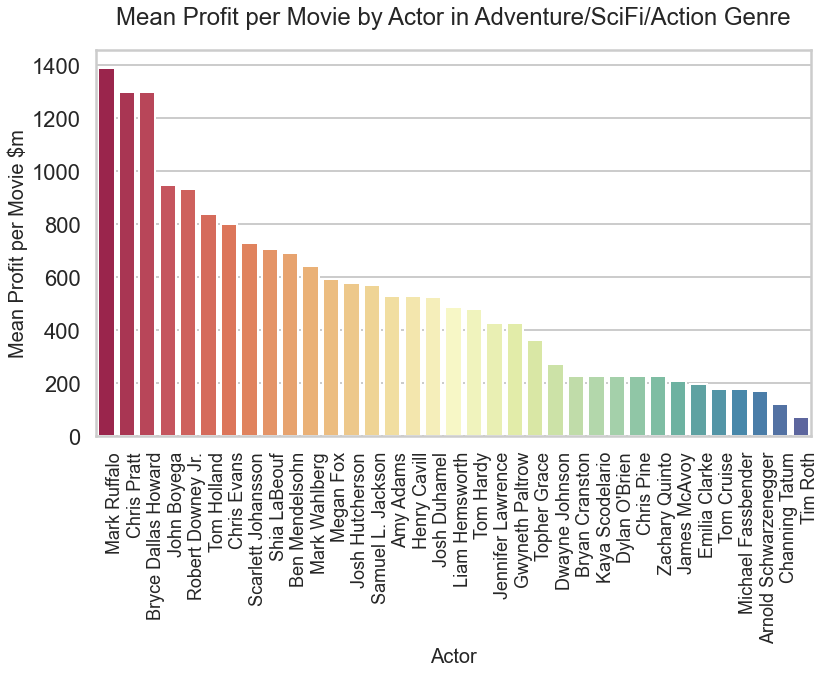

In [33]:
viz.seaborn_bar(adventure_sub_actor_profit_df, 'Actor_List', 'profit_loss_$', 'Actor', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Actor in Adventure/SciFi/Action Genre', 'images/ad_scifi_prof_v_actor.png', rotation =90);

* <font color='red'> **Mark Ruffalo, Chris Pratt, Bryce Dallas Howard, John Boyega and Robert Downey Jr. have been the most profitable actors in the genre**</font> 

### Which director has been most profitable within the Adventure/Sci-Fi/Action genre?

In [11]:
adventure_sub_director_profit_df = dprep.feature_v_financialMean_df_maker('Director_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_director_profit_df = adventure_sub_director_profit_df[adventure_sub_director_profit_df['Counts'] >1]
adventure_sub_director_profit_df

Director_List  release_year  release_day  budget_$  \
1        Joss Whedon   2013.500000    23.500000    295.00   
4      Anthony Russo   2016.000000    25.000000    240.00   
5          Joe Russo   2016.000000    25.000000    240.00   
8          Jon Watts   2018.000000    16.000000    167.50   
9        J.J. Abrams   2012.333333    13.333333    212.00   
11       Michael Bay   2011.600000    20.000000    196.60   
16  Francis Lawrence   2014.500000    18.500000    142.50   
17       Zack Snyder   2014.500000    18.500000    244.00   
18      Bryan Singer   2015.000000    19.500000    189.00   
20       Jon Favreau   2009.000000     4.500000    178.00   
21   Roland Emmerich   2012.500000    17.000000    182.50   
29          Wes Ball   2016.500000    13.000000     61.00   
35        Doug Liman   2011.000000    21.000000    130.25   

    domestic_box_office_$  worldwide_box_office_$  profit_loss_$  return_pct  \
1              541.181889             1455.208595    1160.208595  427.828248   
4              448.882263             1303.620311    1063.620311  420.839107   
5              448.882263             1303.620311    1063.620311  420.839107   
8              362.366612             1005.639708     838.139708  504.948933   
9              474.390302              972.945672     760.945672  299.005123   
11             289.871273              875.106756     678.506756  349.454627   
16             309.429893              707.780959     565.280959  409.438423   
17             310.702856              770.197304     526.197304  214.298917   
18             194.682011              645.200161     456.200161  239.363881   
20             315.518729              603.163968     425.163968  239.997235   
21             134.628226              570.923586     388.423586  205.834414   
29              69.864818              288.222349     227.222349  372.495654   
35              90.189192              294.834896     164.584896  138.031854   

    domestic_%    Run_Time  MetacriticRating  RottenRating  imdbRating  \
1    37.019593  142.000000              67.5     83.500000   76.500000   
4    34.995509  144.000000              71.0     88.333333   79.666667   
5    34.995509  144.000000              71.0     88.333333   79.666667   
8    36.248289  131.000000              71.0     91.000000   74.500000   
9    53.646971  132.333333              78.0     90.333333   78.000000   
11   33.664427  153.200000              39.4     29.000000   60.000000   
16   43.694651  130.000000              64.5     68.500000   66.000000   
17   40.718953  147.500000              49.5     42.500000   67.000000   
18   29.964841  138.000000              63.5     68.500000   74.000000   
20   52.372468  125.000000              68.0     83.000000   74.500000   
21   24.386250  139.000000              40.5     34.500000   55.000000   
29   24.066282  137.000000              46.5     45.500000   63.000000   
35   31.655814  100.500000              53.0     53.000000   70.000000   

    imdb_votes  mean_rating  Counts  
1    1048081.5    75.833333     2.0  
4     802618.0    79.666667     3.0  
5     802618.0    79.666667     3.0  
8     466730.5    78.833333     2.0  
9     648632.0    82.111111     3.0  
11    369399.2    42.800000     5.0  
16    365492.0    66.333333     2.0  
17    696814.5    53.000000     2.0  
18    544033.5    68.666667     2.0  
20    870578.0    75.166667     2.0  
21    267928.0    43.333333     2.0  
29    179105.5    51.666667     2.0  
35    462306.0    58.666667     2.0

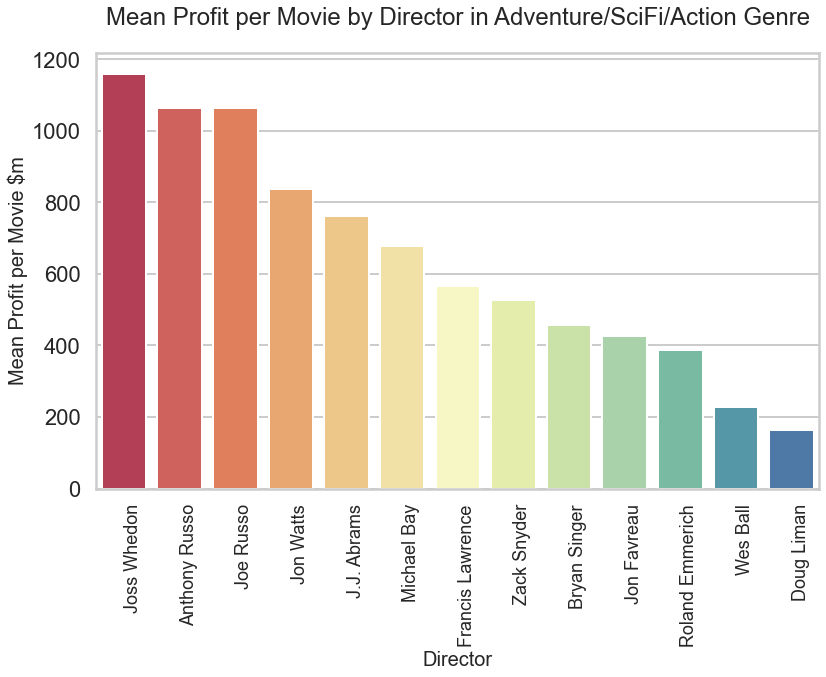

In [35]:
viz.seaborn_bar(adventure_sub_director_profit_df, 'Director_List', 'profit_loss_$', 'Director', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Director in Adventure/SciFi/Action Genre', 'images/ad_scifi_prof_v_director.png', rotation =90);

* <font color='red'> **Josh Whedon, the Russo brothers, Jon Watts and J.J Abrams have been the most profitable directors in the genre**</font> 

### Which writer has been most profitable within the Adventure/Sci-Fi/Action genre?

In [12]:
adventure_sub_writer_profit_df = dprep.feature_v_financialMean_df_maker('Writer_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_writer_profit_df = adventure_sub_writer_profit_df[adventure_sub_writer_profit_df['Counts'] >1]
adventure_sub_writer_profit_df

Writer_List  release_year  release_day    budget_$  \
3       Colin Trevorrow   2016.500000     7.500000  192.500000   
4           Joss Whedon   2013.500000    23.500000  295.000000   
11        Michael Arndt   2014.000000    17.500000  213.000000   
15      Lawrence Kasdan   2016.500000    19.500000  290.500000   
16             Stan Lee   2014.666667    17.833333  222.083333   
17      Stephen McFeely   2014.750000    24.250000  215.000000   
18   Christopher Markus   2014.750000    24.250000  215.000000   
19         Ehren Kruger   2011.333333    26.000000  205.000000   
31             Zak Penn   2012.666667    19.333333  170.833333   
35           Jack Kirby   2011.500000    17.500000  251.250000   
36      Suzanne Collins   2013.666667    15.000000  121.666667   
37          Peter Craig   2014.500000    18.500000  142.500000   
38         Danny Strong   2014.500000    18.500000  142.500000   
39            Joe Simon   2013.666667    24.000000  186.666667   
45    Christopher Nolan   2011.500000    15.000000  192.500000   
50        Alex Kurtzman   2009.500000    12.500000  172.750000   
51         Roberto Orci   2009.500000    12.500000  172.750000   
52         Jeff Pinkner   2017.000000     8.000000   77.000000   
55           Art Marcum   2012.500000    11.000000  201.500000   
64            Billy Ray   2015.500000    16.500000  132.500000   
65       David S. Goyer   2014.000000    19.000000  188.875000   
71        Simon Kinberg   2014.250000    14.500000  165.125000   
72     Laeta Kalogridis   2017.000000    12.500000  162.500000   
73        James Cameron   2017.000000    12.500000  162.500000   
77        James Dashner   2016.500000    13.000000   61.000000   
78          T.S. Nowlin   2016.500000    13.000000   61.000000   
89     Gene Roddenberry   2012.500000    14.500000  162.500000   
125          Jim Thomas   2014.000000    10.000000   64.000000   

     domestic_box_office_$  worldwide_box_office_$  profit_loss_$  return_pct  \
3               535.013193             1489.156986    1296.656986  673.171553   
4               541.181889             1455.208595    1160.208595  427.828248   
11              512.884730             1176.266225     963.266225  357.320789   
15              575.214868             1228.883582     938.383582  308.837589   
16              445.942207             1132.365856     910.282523  399.585949   
17              380.825323             1070.357677     855.357677  356.802505   
18              380.825323             1070.357677     855.357677  356.802505   
19              333.313830             1021.455950     816.455950  400.129135   
31              298.618332              786.576574     615.743241  317.519866   
35              296.906391              830.445419     579.195419  187.711625   
36              342.290160              697.828432     576.161766  522.093690   
37              309.429893              707.780959     565.280959  409.438423   
38              309.429893              707.780959     565.280959  409.438423   
39              281.495271              745.630062     558.963395  281.898837   
45              291.810856              698.290992     505.790992  276.126358   
50              301.966686              599.753372     427.003372  247.425432   
51              301.966686              599.753372     427.003372  247.425432   
52              124.212195              482.433649     405.433649  414.396510   
55              224.386404              594.032443     392.532443  196.219695   
64              235.131885              464.147873     331.647873  391.370319   
65              190.957729              503.351947     314.476947  158.450475   
71              133.845531              439.849507     274.724507  167.943465   
72               87.799583              417.025467     254.525467  157.609408   
73               87.799583              417.025467     254.525467  157.609408   
77               69.864818              288.222349     227.222349  372.4

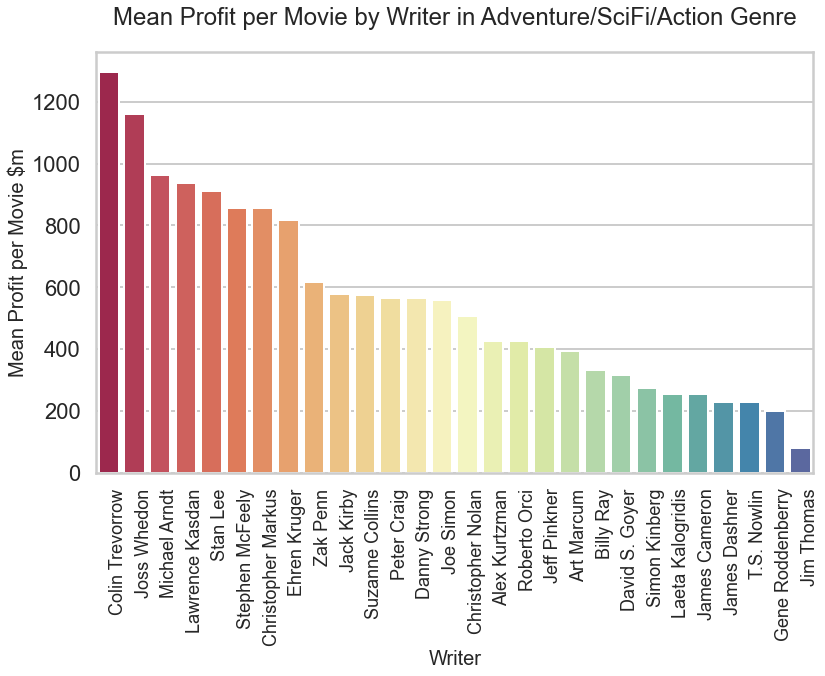

In [37]:
viz.seaborn_bar(adventure_sub_writer_profit_df, 'Writer_List', 'profit_loss_$', 'Writer', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Writer in Adventure/SciFi/Action Genre', 'images/ad_scifi_prof_v_writer.png', rotation =90);

* <font color='red'> **Colin Trevorrow, Joss Whedon, Michael Arndt, Lawrence Kasdan and Stan Lee have been the most profitable writers in the genre**</font> 

### How do the top actors compare in terms of ROI, profitability and user ratings. And what budget are they used to working with?

In [13]:
def top_crew_list_maker(df, crew_column):
    return df[crew_column][:5].tolist()


In [14]:
top_a_actors = top_crew_list_maker(adventure_sub_actor_profit_df, 'Actor_List')

In [15]:
top_a_directors = top_crew_list_maker(adventure_sub_director_profit_df, 'Director_List')

In [16]:
top_a_writers = top_crew_list_maker(adventure_sub_writer_profit_df, 'Writer_List')

In [17]:
a_top_full_crew_df = dprep.make_crew_df(financial_attributes_join, top_a_actors, top_a_directors, top_a_writers)

In [18]:
a_top_full_crew_df

imdb_code                                 title  release_year  \
0     tt4154796                     Avengers: Endgame          2019   
2     tt2395427               Avengers: Age of Ultron          2015   
3     tt2488496  Star Wars Ep. VII: The Force Awakens          2015   
4     tt4154756                Avengers: Infinity War          2018   
9     tt3778644               Solo: A Star Wars Story          2018   
15    tt3498820            Captain America: Civil War          2016   
24    tt0848228                          The Avengers          2012   
31    tt0369610                        Jurassic World          2015   
38    tt1825683                         Black Panther          2018   
39    tt2527336     Star Wars Ep. VIII: The Last Jedi          2017   
46    tt3896198         Guardians of the Galaxy Vol 2          2017   
64    tt7146812                                Onward          2020   
70    tt1408101               Star Trek Into Darkness          2013   
75    tt0371746                              Iron Man          2008   
102   tt2250912                Spider-Man: Homecoming          2017   
112   tt6673612                              Dolittle          2020   
115   tt4881806        Jurassic World: Fallen Kingdom          2018   
116   tt2015381               Guardians of the Galaxy          2014   
117   tt1228705                            Iron Man 2          2010   
118   tt1843866   Captain America: The Winter Soldier          2014   
134   tt6320628             Spider-Man: Far From Home          2019   
149   tt2557478                 Pacific Rim: Uprising          2018   
193   tt0796366                             Star Trek          2009   
202   tt0800080                   The Incredible Hulk          2008   
212   tt1951264       The Hunger Games: Catching Fire          2013   
238   tt1515091    Sherlock Holmes: A Game of Shadows          2011   
255   tt1483013                              Oblivion          2013   
274   tt1355644                            Passengers          2016   
324   tt3513498     The LEGO Movie 2: The Second Part          2019   
343   tt0988045                       Sherlock Holmes          2009   
349   tt0942385                        Tropic Thunder          2008   
352   tt2404435                 The Magnificent Seven          2016   
357   tt3110958                      Now You See Me 2          2016   
379   tt0443706                                Zodiac          2007   
396   tt1130884                        Shutter Island          2010   
430   tt1670345                        Now You See Me          2013   
492   tt1231583                              Due Date          2010   
495   tt2788732                         Pete’s Dragon          2016   
523   tt1490017                        The Lego Movie          2014   
558   tt0821642                           The Soloist          2009   
617   tt1790885                      Zero Dark Thirty          2012   
630   tt1650062                               Super 8          2011   
649   tt1872194                             The Judge          2014   
656   tt1212419                             Hereafter          2010   
819   tt5390504                               Detroit          2017   
1027  tt1195478              The Five-Year Engagement          2012   
1196  tt0861689                             Blindness          2008   
1218  tt1100089                            Foxcatcher          2014   
1247  tt2387559                          Delivery Man          2013   
1304  tt1895587                             Spotlight          2015   
1383  tt0844286                    The Brothers Bloom          2009   
1435  tt4287320                            The Circle          2017   
1616  tt0466893                              Margaret          2011   
1652  tt1478964                      Attack the Block          2011   
1711  tt1730687                     Darling Companion          2012   
1918  tt1178665               

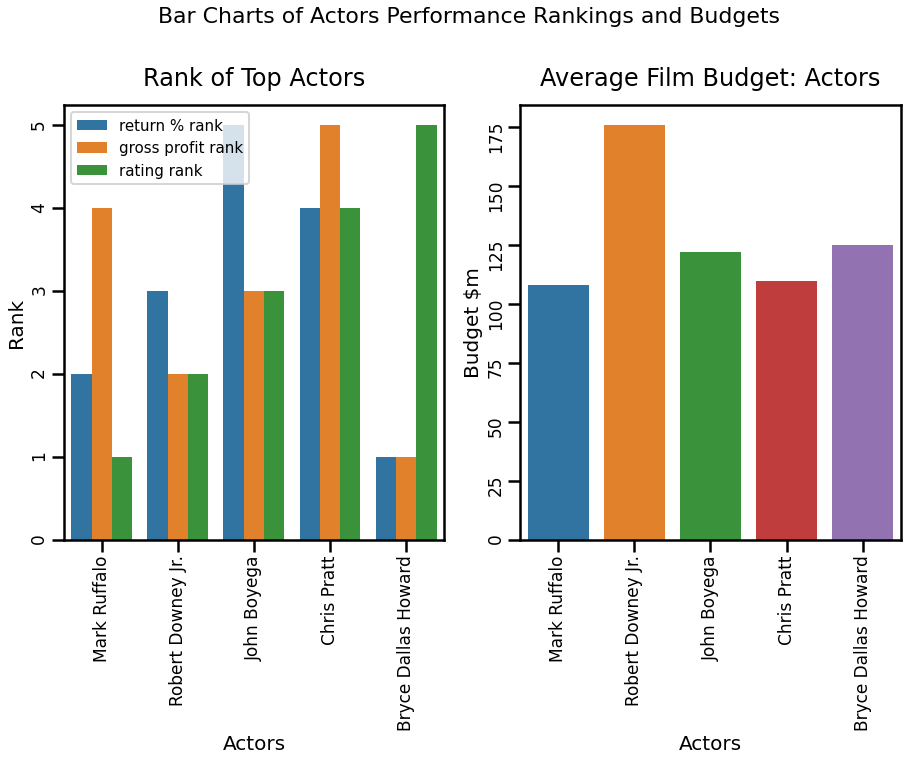

In [36]:
a_actor_chart = viz.graph_generator(a_top_full_crew_df, 'Actor_List', top_a_actors, 'Actors', 'ad')

* <font color='red'> **Mark Ruffalo is the top performing actor in terms of user ratings of his movies and 2nd in ROI of his movies. Bryce Dallas Howard is the top performing actor in terms of her movies' ROI and profitability, but is the lowest ranked in terms of their user ratings**<br>
* **Mark Ruffalo works in movies with a mean budget of a
just over 100 million dollars, while Bryce Dallas Howard works in movies with a mean budget of around 125 million dollars**</font> 

### How do the top directors compare in terms of ROI, profitability and user ratings. And what budget are they used to working with?

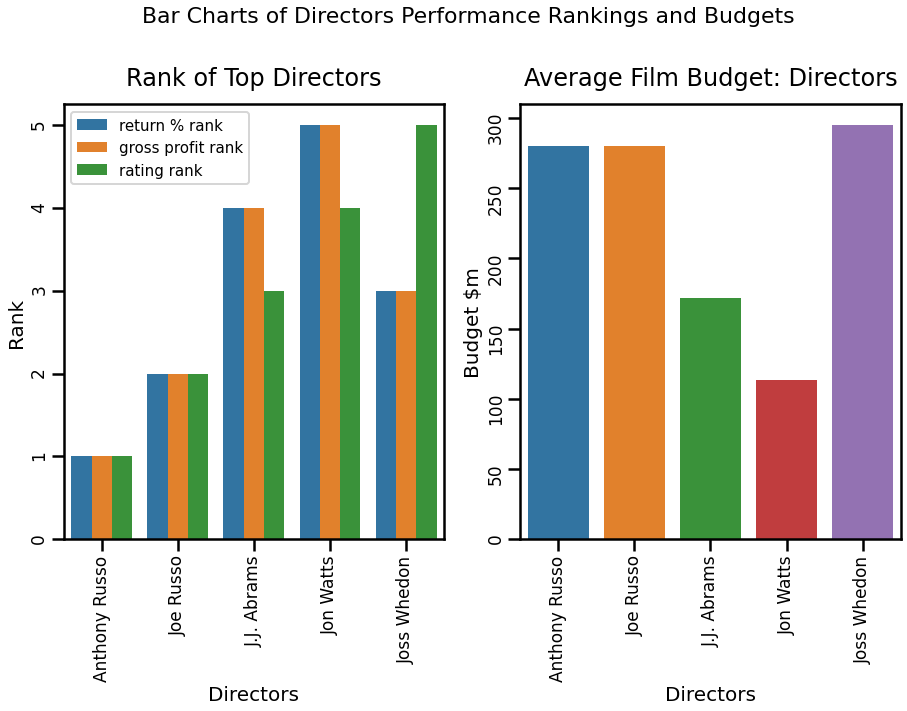

In [37]:
a_director_chart = viz.graph_generator(a_top_full_crew_df, 'Director_List', top_a_directors, 'Directors', 'ad')

* <font color='red'> **The Russo brothers have been the most profitable and best user rated directors, with Joss Whedon the next most profitable director**
* **The Russo brothers operate at budgets of around 275 million dollars, with Joss Whedon operating at around 290 million dollars** 
* **J.J.Abrams operates at a lower budget of around 160 million dollars and is third ranked in terms of profitablilty (albeit with the Russo brothers taking up 2 spots with the same movies, so 2nd ranked in reality) and 3rd ranked in terms of ratings (2nd taking into account the Russo brothers)** </font> 

### How do the top writers compare in terms of ROI, profitability and user ratings. And what budget are they used to working with?

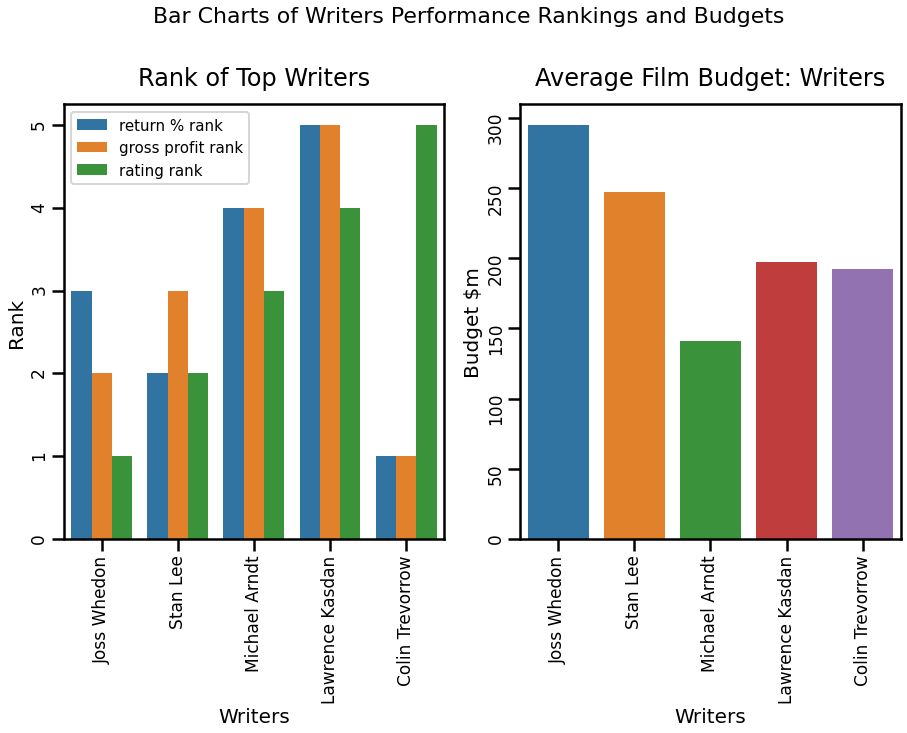

In [38]:
a_writer_chart = viz.graph_generator(a_top_full_crew_df, 'Writer_List', top_a_writers, 'Writers', 'ad')

* <font color='red'> **Colin Trevorrow has written the most profitable movies in the genre, but is lowest ranked in terms of user ratings. He generally works on movies with a budget of around 195 million dollars**
* **Joss Whedon is best rated by users and is ranked 2nd for gross mean profit and 3rd for ROI** <font> 

### How long are the most profitable Action/Adventure/Sci-Fi movies?

In [46]:
adventure_sub_runtime_profit_df = dprep.feature_v_financialMean_df_maker('Run_Time', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_runtime_profit_df = adventure_sub_runtime_profit_df.reset_index()
adventure_sub_runtime_profit_df = adventure_sub_runtime_profit_df.sort_values(by='Run_Time')

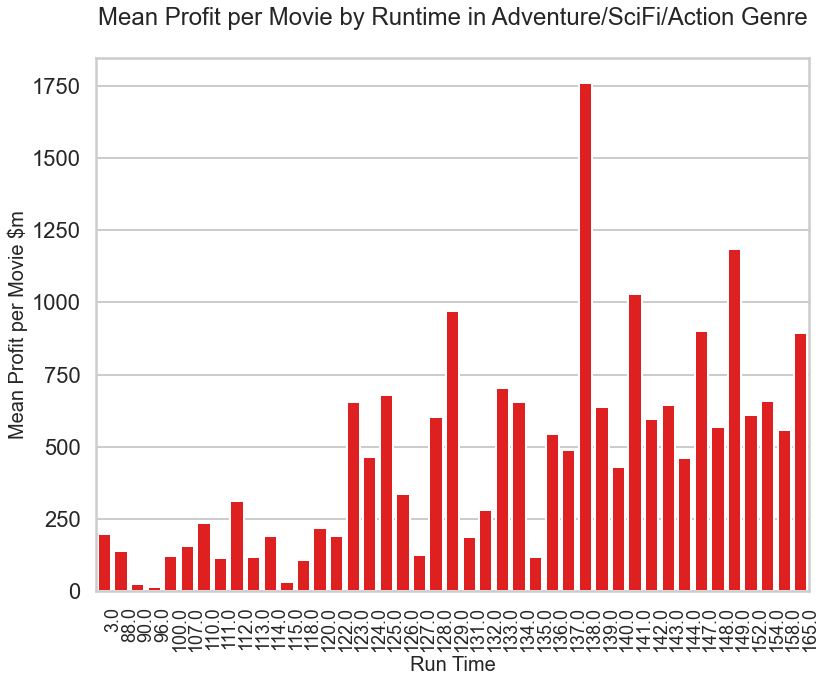

In [47]:
viz.seaborn_bar(adventure_sub_runtime_profit_df, 'Run_Time', 'profit_loss_$', 'Run Time', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Runtime in Adventure/SciFi/Action Genre', 'images/ad_runtime_rank.png', rotation =90);

* <font color='red'> **The most profitable movies in the genre tend to be on the longer side, with those over 128 mins scoring highly, and those 138 mins or over scoring particularly highly**

### What months saw the most profitable releases in the genre?

In [48]:
adventure_sub_month_profit_df = dprep.feature_v_financialMean_df_maker('release_month', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])

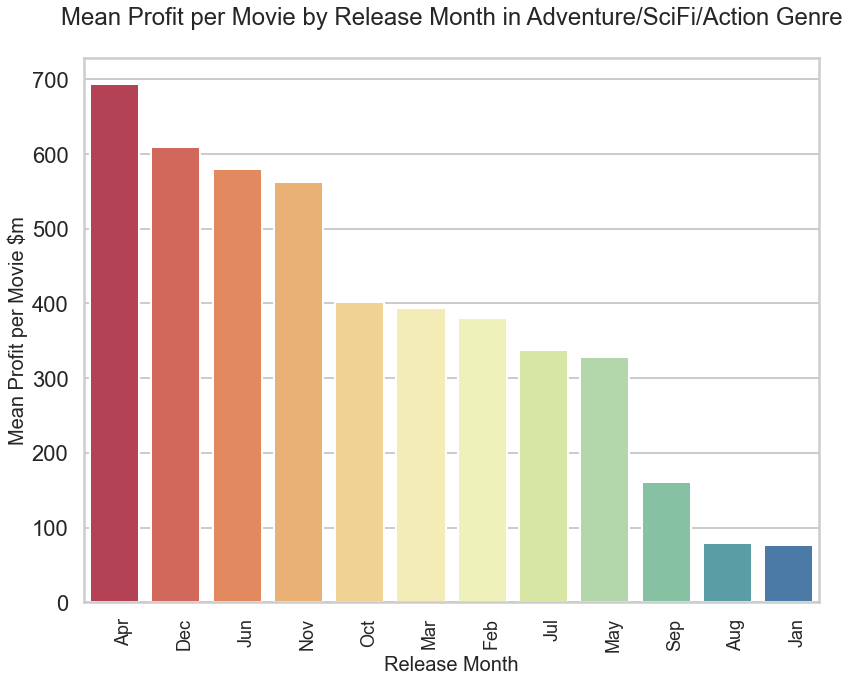

In [49]:
viz.seaborn_bar(adventure_sub_month_profit_df, 'release_month', 'profit_loss_$', 'Release Month', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Release Month in Adventure/SciFi/Action Genre', 'images/ad_month_rank.png', rotation =90);

* <font color='red'> **The most profitable release months were April, December, November and June**

### What are the most profitable movies in the genre?

In [9]:
adventure_sub_title_profit_df = dprep.feature_v_financialMean_df_maker('title', 'profit_loss_$', financial_attributes_join, genre_filter=['Adventure', 'Sci-Fi', 'Action'])
adventure_sub_title_profit_df = adventure_sub_title_profit_df[:20]

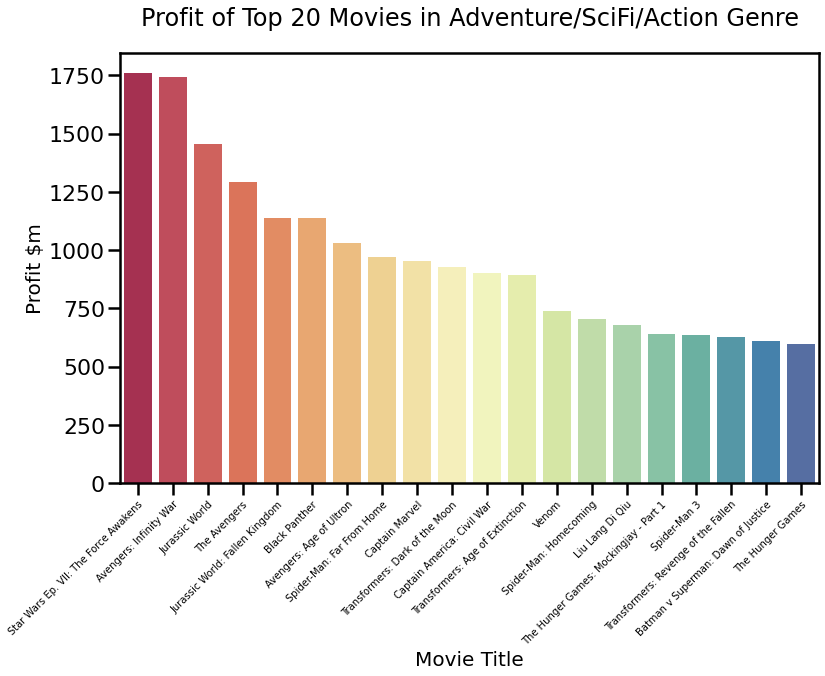

In [20]:
viz.seaborn_bar(adventure_sub_title_profit_df, 'title', 'profit_loss_$', 'Movie Title', 'Profit $m', 'Profit of Top 20 Movies in Adventure/SciFi/Action Genre', 'images/ad_title_rank.png', f=10, rotation =45);

* <font color='red'> **Star Wars VII, Avengers, Jurassic World and Black Panther are the most profitable movies. Superhero movies dominate the genre**

### Which subgenre within the Horror genre has produced the movies with the highest mean profits?

<font color='red'> **FOR THE LOWER BUDGET CHOICE, WE WILL PERFORM THE SAME ANALYSIS BUT FOR THE HORROR GENRE**

<img src="images/scared.jpg" style="width: 700px;"/>

In [50]:
horror_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'return_pct', financial_attributes_join, genre_filter=['Horror'])
horror_genre_profit_df.head()

Genre_List  release_year  release_day   budget_$  domestic_box_office_$  \
0    Mystery   2013.980000    15.640000  13.744000              38.522703   
1   Thriller   2013.076087    15.706522  14.010326              36.973140   
2      Crime   2010.416667    22.916667  16.216667              50.645678   
3  Biography   2014.000000     3.000000  16.750000              21.050993   
4      Drama   2014.833333    16.407407  19.516667              32.573033   

   worldwide_box_office_$  profit_loss_$  return_pct  domestic_%    Run_Time  \
0               81.040373      67.296373  885.577653   51.514437   98.070000   
1               76.016315      62.005989  715.584249   52.895826   98.445652   
2               95.807163      79.590496  640.936604   55.503623   96.583333   
3               37.251374      20.501374  604.145895   57.095273   67.500000   
4               67.883969      48.367303  405.209254   50.625290  102.000000   

   MetacriticRating  RottenRating  imdbRating     imdb_votes  mean_rating  \
0         46.646465     43.112245   57.510000   94723.030000    48.921769   
1         46.067416     43.855556   57.152174   91846.076087    49.545455   
2         42.666667     37.250000   60.666667  103105.333333    46.861111   
3         28.000000     13.000000   57.500000   16146.500000    32.000000   
4         52.433962     51.346154   59.377358   97748.277778    54.185897   

   Counts  
0   100.0  
1    92.0  
2    12.0  
3     2.0  
4    54.0

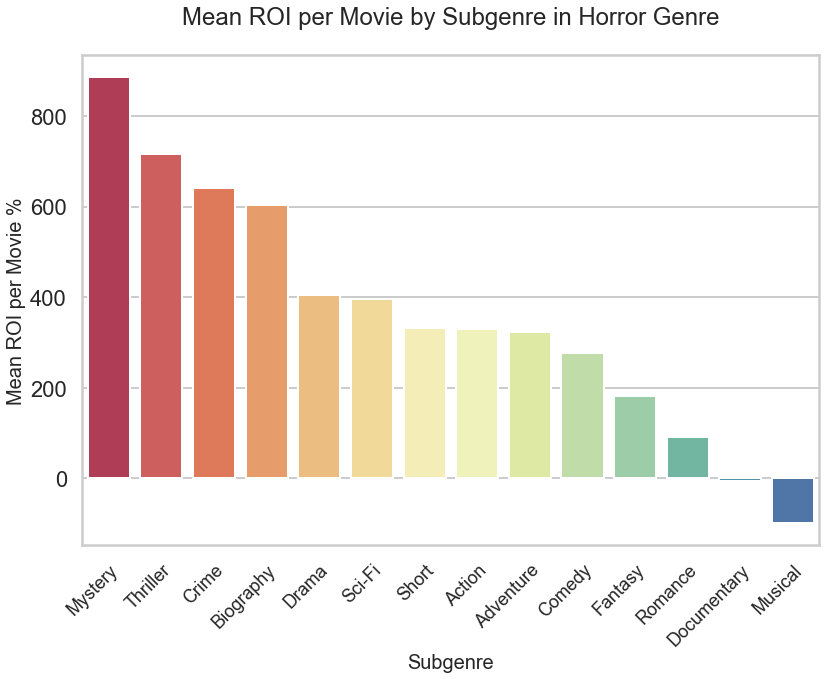

In [51]:
viz.seaborn_bar(horror_genre_profit_df, 'Genre_List', 'return_pct', 'Subgenre', 'Mean ROI per Movie %', 'Mean ROI per Movie by Subgenre in Horror Genre', 'images/ho_budget_v_genre.png');

* <font color='red'> **The Mystery  subgenre has produced the most profitable movies in the Horror genre**

### Which subgenre within the Horror/Mystery genre has produced the movies with the highest mean profits?

In [52]:
horror_sub1_genre_profit_df = dprep.feature_v_financialMean_df_maker('Genre_List', 'return_pct', financial_attributes_join, genre_filter=['Horror', 'Mystery'])
horror_sub1_genre_profit_df = horror_sub1_genre_profit_df[horror_sub1_genre_profit_df['Counts'] >2]
horror_sub1_genre_profit_df.head()

Genre_List  release_year  release_day   budget_$  domestic_box_office_$  \
1   Thriller   2013.727273    14.727273  12.013636              50.425808   
3      Crime   2009.800000    24.400000  13.560000              44.076893   
4      Drama   2016.476190    16.809524  13.809524              23.377864   
5     Sci-Fi   2013.571429    13.285714  10.114286              14.899917   
7    Fantasy   2015.000000    16.600000  19.100000              28.467041   

   worldwide_box_office_$  profit_loss_$   return_pct  domestic_%    Run_Time  \
1              104.568354      92.554718  1146.518634   52.234774   98.704545   
3              102.508546      88.948546   776.823304   49.144825   91.200000   
4               53.585373      39.775849   542.125783   46.000071  105.285714   
5               23.623224      13.508938   241.655569   73.839144   91.285714   
7               54.887492      35.787492   230.305571   53.428095  107.000000   

   MetacriticRating  RottenRating  imdbRating     imdb_votes  mean_rating  \
1         46.886364     43.613636   57.613636  108337.909091    49.371212   
3         30.600000     19.000000   58.600000  104807.800000    36.066667   
4         54.333333     51.700000   59.619048   97166.047619    54.733333   
5         39.857143     33.857143   54.571429   58117.000000    42.761905   
7         53.200000     52.200000   60.600000   98423.600000    55.333333   

   Counts  
1    44.0  
3     5.0  
4    21.0  
5     7.0  
7     5.0

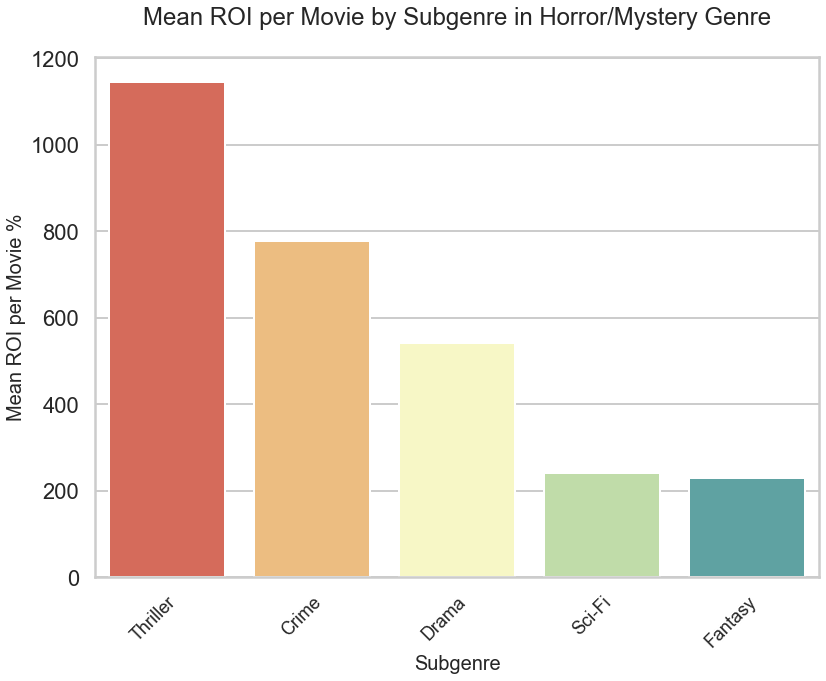

In [53]:
viz.seaborn_bar(horror_sub1_genre_profit_df, 'Genre_List', 'return_pct', 'Subgenre', 'Mean ROI per Movie %', 'Mean ROI per Movie by Subgenre in Horror/Mystery Genre', 'images/ho_my_budget_v_genre.png');

* <font color='red'> **The Thriller  subgenre has produced the most profitable movies in the Horror genre**

### Which budgets have produced the most profitable movies within the Horror/Mystery/Thriller genre?

In [12]:
add_horror_list=[]
for index, row in financial_attributes_join.iterrows():
    if 'Horror' in row['Genre_List']:
        add_horror_list.append(row)
horror_all = pd.DataFrame(add_horror_list)
horror_all_s = dprep.budget_prep(horror_all, 'horror')
horror_all_s


imdb_code             title  release_year release_month  release_day  \
881   tt1396484                It          2017           Aug           31   
448   tt7349950   It: Chapter Two          2019           Sep            4   
97    tt4779682           The Meg          2018           Aug            9   
71    tt0816711       World War Z          2013           Jun           19   
1240  tt5814060           The Nun          2018           Sep            6   
...         ...               ...           ...           ...          ...   
1193  tt5968394     Captive State          2019           Mar           14   
1515  tt1545106             Vamps          2012           Nov            2   
484   tt4682266   The New Mutants          2020           Aug           26   
826   tt1188729          Pandorum          2009           Sep           25   
959   tt1817771  Freaks of Nature          2015           Oct           30   

      budget_$  domestic_box_office_$  worldwide_box_office_$  profit_loss_$  \
881       35.0              328828874               701083042     666.083042   
448       70.0              211593228               469566806     399.566806   
97       178.0              145443742               527370715     349.370715   
71       190.0              202706711               531861650     341.861650   
1240      22.0              117450119               363391647     341.391647   
...        ...                    ...                     ...            ...   
1193      25.0                5958315                 9363210     -15.636790   
1515      16.0                   3361                   94812     -15.905188   
484       67.0               23855569                44612280     -22.387720   
826       40.0               10330853                17033431     -22.966569   
959       33.0                  70958                   70958     -32.929042   

       return_pct  ...       Director_List  \
881   1903.094406  ...   [Andy Muschietti]   
448    570.809723  ...   [Andy Muschietti]   
97     196.275683  ...    [Jon Turteltaub]   
71     179.927184  ...      [Marc Forster]   
1240  1551.780214  ...       [Corin Hardy]   
...           ...  ...                 ...   
1193   -62.547160  ...      [Rupert Wyatt]   
1515   -99.407425  ...    [Amy Heckerling]   
484    -33.414507  ...        [Josh Boone]   
826    -57.416422  ...  [Christian Alvart]   
959    -99.784976  ...  [Robbie Pickering]   

                                            Writer_List  Rated Run_Time  \
881   [Chase Palmer, Cary Joji Fukunaga, Gary Dauber...      R    135.0   
448                      [Stephen King, Gary Dauberman]      R    169.0   
97           [Dean Georgaris, Jon Hoeber, Erich Hoeber]  PG-13    113.0   
71    [Matthew Michael Carnahan, Drew Goddard, Damon...  PG-13    116.0   
1240                        [Gary Dauberman, James Wan]      R     96.0   
...                                                 ...    ...      ...   
1193                       [Erica Beeney, Rupert Wyatt]  PG-13    109.0   
1515                                   [Amy Heckerling]  PG-13     92.0   
484                             [Josh Boone, Knate Lee]  PG-13     94.0   
826                   [Travis Milloy, Christian Alvart]      R    108.0   
959                                        [Oren Uziel]      R     92.0   

     MetacriticRating RottenRating  imdbRating  imdb_votes  mean_rating  \
881              69.0         86.0        73.0    487973.0    76.000000   
448              58.0         62.0        65.0    229109.0    61.666667   
97               46.0         46.0        56.0    159717.0    49.333333   
71               63.0         66.0        70.0    625402.0    66.333333   
1240             46.0         24.0        53.0    129749.0    41.000000   
...               ...          ...         ...         ...          ...   
1193             54.0         44.0        60.0     52336.0    52.666667   
1515             57.0         56.0        52.0      99

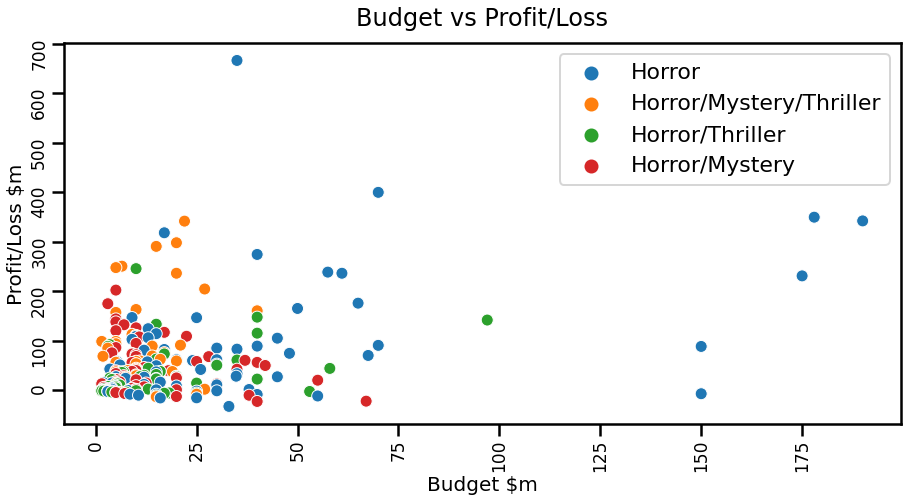

In [13]:
viz.budget_sub_scatter(horror_all_s, 'horror')

* <font color='red'> **The most profitable Horror/Thriller/Mysteries have been made on a budget of between 20 to 25 million dollars**

### Which actor has been most profitable within the Horror/Mystery/Thriller genre?

In [22]:
horror_sub_actor_profit_df = dprep.feature_v_financialMean_df_maker('Actor_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_actor_profit_df = horror_sub_actor_profit_df[horror_sub_actor_profit_df['Counts'] >1]
horror_sub_actor_profit_df

Actor_List  release_year  release_day  budget_$  \
17  Patrick Wilson        2015.4        13.00     18.70   
18    Vera Farmiga        2015.5        18.75     26.75   
23   Angus Sampson        2016.5         3.50     10.00   
24      Rose Byrne        2012.0         7.00      3.25   
57   James Ransone        2013.5        12.00      6.50   

    domestic_box_office_$  worldwide_box_office_$  profit_loss_$   return_pct  \
17              82.942681              202.200895     183.500895  2468.448030   
18              79.678514              206.995375     180.245375   734.899481   
23              59.981944              146.632563     136.632563  1366.325630   
24              68.797798              130.896200     127.646200  4848.244683   
57              37.913929               70.916016      64.416016  1632.651242   

    domestic_%  Run_Time  MetacriticRating  RottenRating  imdbRating  \
17   42.751170    107.80              53.2         62.40       66.20   
18   40.215726    113.25              54.0         65.75       66.75   
23   41.276757    100.00              50.5         45.50       59.00   
24   52.850278    104.50              46.0         52.50       67.00   
57   53.043465    103.50              42.5         39.00       60.50   

    imdb_votes  mean_rating  Counts  
17    215377.4    60.600000     5.0  
18    206479.5    62.166667     4.0  
23     77569.5    51.666667     2.0  
24    226803.5    55.166667     2.0  
57    141739.5    47.333333     2.0

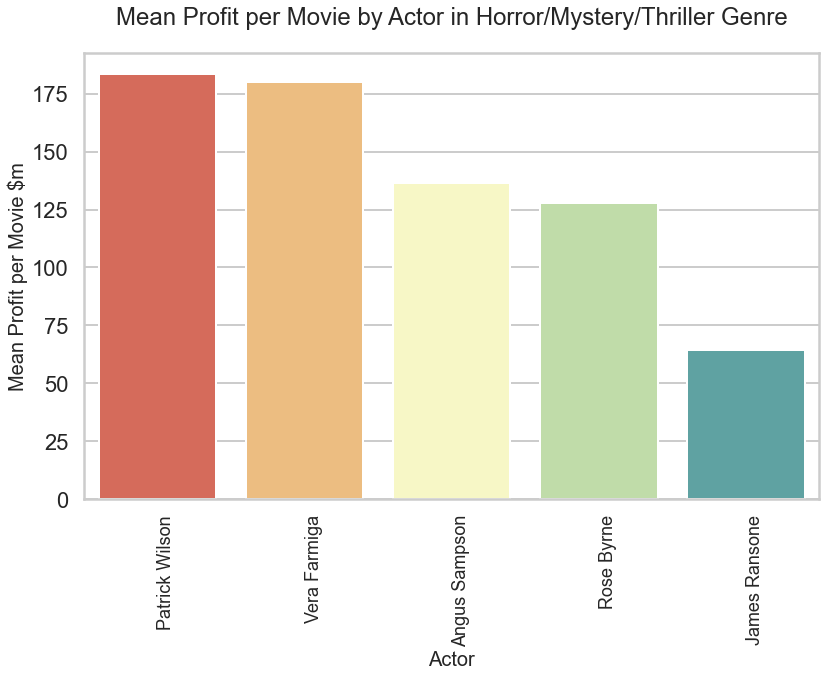

In [55]:
viz.seaborn_bar(horror_sub_actor_profit_df, 'Actor_List', 'profit_loss_$', 'Actor', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Actor in Horror/Mystery/Thriller Genre', 'images/horr_subs_prof_v_actor.png', rotation =90);

* <font color='red'> **Patrick Wilson has been the most profitable actor in the genre, followed by Vera Farmiga, Angus Sampson, Rose Byrne and James Ransome**

### Which director has been most profitable within the Horror/Mystery/Thriller genre?

In [23]:
horror_sub_director_profit_df = dprep.feature_v_financialMean_df_maker('Director_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_director_profit_df = horror_sub_director_profit_df[horror_sub_director_profit_df['Counts'] >1]
horror_sub_director_profit_df

Director_List  release_year  release_day   budget_$  \
3        Jordan Peele   2018.000000    22.000000  12.500000   
5           James Wan   2012.333333    10.666667   8.833333   
7      Michael Chaves   2020.000000    12.000000  24.500000   
24  John Erick Dowdle   2012.000000    23.000000   7.500000   

    domestic_box_office_$  worldwide_box_office_$  profit_loss_$   return_pct  \
3              175.562622              254.296027     241.796027  3065.231148   
5               91.665246              193.178934     184.345601  3728.403792   
7               60.149406              160.938237     136.438237   826.165488   
24              27.450985               52.589090      45.089090   635.011230   

    domestic_%  Run_Time  MetacriticRating  RottenRating  imdbRating  \
3    69.043452     110.0         83.000000     95.500000   72.500000   
5    49.647634     107.0         53.333333     63.666667   69.666667   
7    38.867952     102.5         47.000000     42.000000   58.000000   
24   51.951417      86.5         41.000000     37.500000   62.000000   

       imdb_votes  mean_rating  Counts  
3   392766.000000    83.666667     2.0  
5   308596.666667    62.222222     3.0  
7    64476.000000    49.000000     2.0  
24  112226.000000    46.833333     2.0

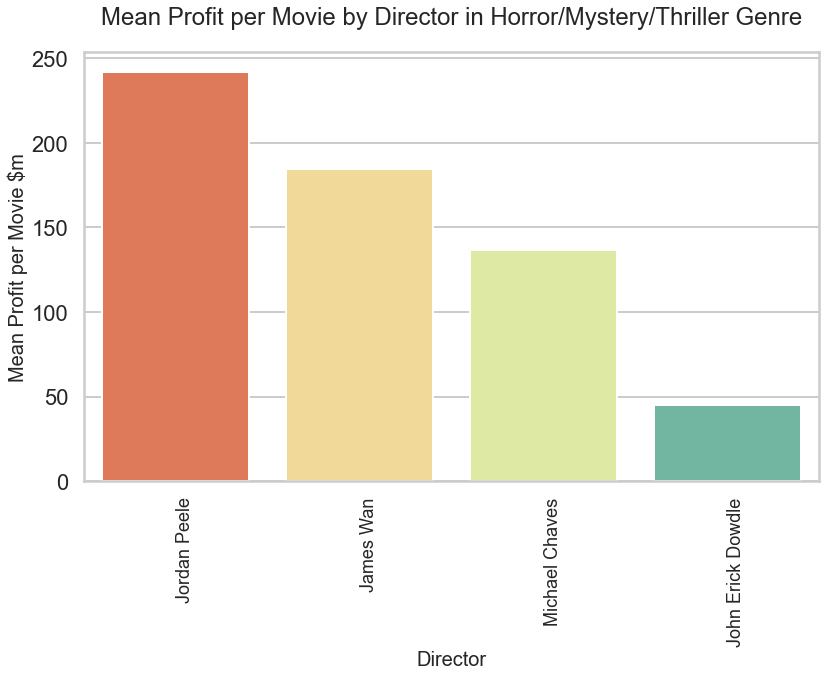

In [57]:
viz.seaborn_bar(horror_sub_director_profit_df, 'Director_List', 'profit_loss_$', 'Director', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Director in Horror/Mystery/Thriller Genre', 'images/horr_subs_prof_v_director.png', rotation =90);

* <font color='red'> **Jordan Peele has been the most profitable director in the genre, followed by James Wan, Michael Chaves and John Erick Dowdle**

### Which writer has been most profitable within the Horror/Mystery/Thriller genre?

In [24]:
horror_sub_writer_profit_df = dprep.feature_v_financialMean_df_maker('Writer_List', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_writer_profit_df = horror_sub_writer_profit_df[horror_sub_writer_profit_df['Counts'] >1]
horror_sub_writer_profit_df

Writer_List  release_year  release_day  budget_$  \
1                    Gary Dauberman       2017.00         9.25    17.625   
2                      Jordan Peele       2018.00        22.00    12.500   
3                        Chad Hayes       2017.00        12.50    30.000   
4                         James Wan       2017.75        13.00    23.500   
5                    Leigh Whannell       2014.25         5.25     6.625   
8   David Leslie Johnson-McGoldrick       2015.00        15.50    30.000   
14                     Stiles White       2013.00        27.50     9.500   
15                   Juliet Snowden       2013.00        27.50     9.500   
20               M. Night Shyamalan       2012.50        13.50     7.500   
24                C. Robert Cargill       2013.50        12.00     6.500   
25                 Scott Derrickson       2013.50        12.00     6.500   
38                      Jeff Buhler       2013.50         3.00    18.000   
49                       Ray Wright       2010.00        13.50    23.000   

    domestic_box_office_$  worldwide_box_office_$  profit_loss_$   return_pct  \
1               94.492181              289.223006     271.598006  2023.976906   
2              175.562622              254.296027     241.796027  3065.231148   
3              101.482608              258.979740     228.979740   944.629854   
4               85.188558              239.195208     215.695208  1461.809822   
5               64.389871              138.764382     132.139382  3107.285157   
8               53.580663              139.492254     109.492254   347.192419   
14              49.993299               93.112848      83.612848  1229.167263   
15              49.993299               93.112848      83.612848  1229.167263   
20              49.442880               81.015965      73.515965  1203.548730   
24              37.913929               70.916016      64.416016  1632.651242   
25              37.913929               70.916016      64.416016  1632.651242   
38              27.399122               56.699989      38.699989   171.514468   
49              26.192720               42.609681      19.609680   101.825744   

    domestic_%  Run_Time  MetacriticRating  RottenRating  imdbRating  \
1    32.656424    102.50             49.50         47.25       57.75   
2    69.043452    110.00             83.00         95.50       72.50   
3    37.994834    112.00             60.50         71.00       69.00   
4    37.188765    105.00             48.00         46.00       60.25   
5    47.063517    102.25             48.25         49.00       63.00   
8    42.777464    117.50             47.50         56.00       66.50   
14   54.239022     90.50             41.50         22.50       52.00   
15   54.239022     90.50             41.50         22.50       52.00   
20   59.620381     87.00             49.50         58.50       62.00   
24   53.043465    103.50             42.50         39.00       60.50   
25   53.043465    103.50             42.50         39.00       60.50   
38   26.784714    100.50             57.50         65.00       58.50   
49   57.701043    105.00             40.50         45.50       63.50   

    imdb_votes  mean_rating  Counts  
1    117388.75    51.500000     4.0  
2    392766.00    83.666667     2.0  
3    278100.00    66.833333     2.0  
4    110780.00    51.416667     4.0  
5    152186.50    53.416667     4.0  
8    143327.50    56.666667     2.0  
14    54657.00    38.666667     2.0  
15    54657.00    38.666667     2.0  
20   130597.50    56.666667     2.0  
24   141739.50    47.333333     2.0  
25   141739.50    47.333333     2.0  
38    75065.50    60.333333     2.0  
49    98855.50    49.833333     2.0

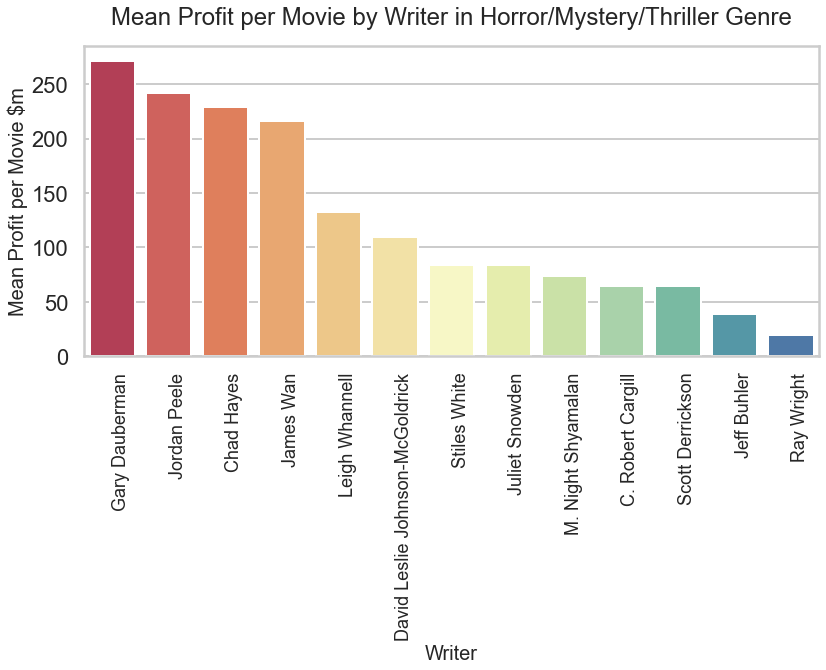

In [59]:
viz.seaborn_bar(horror_sub_writer_profit_df, 'Writer_List', 'profit_loss_$', 'Writer', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Writer in Horror/Mystery/Thriller Genre', 'images/horr_subs_prof_v_writer.png', rotation =90);

* <font color='red'> **Gary Dauberman has been the most profitable writer in the genre, followed by Jordan Peele, Chad Hayes, James Wan and Leigh Whannell**

### How do the top actors compare in terms of ROI, profitability and user ratings. And what budget are they used to working with?

In [25]:
top_h_actors = top_crew_list_maker(horror_sub_actor_profit_df, 'Actor_List')

In [26]:
top_h_directors = top_crew_list_maker(horror_sub_director_profit_df, 'Director_List')

In [27]:
top_h_writers = top_crew_list_maker(horror_sub_writer_profit_df, 'Writer_List')

In [28]:
h_top_full_crew_df = dprep.make_crew_df(financial_attributes_join, top_h_actors, top_h_directors, top_h_writers)

In [29]:
h_top_full_crew_df

imdb_code                                 title  release_year  \
0     tt4154796                     Avengers: Endgame          2019   
2     tt2395427               Avengers: Age of Ultron          2015   
3     tt2488496  Star Wars Ep. VII: The Force Awakens          2015   
4     tt4154756                Avengers: Infinity War          2018   
9     tt3778644               Solo: A Star Wars Story          2018   
...         ...                                   ...           ...   
2238  tt1922777                              Sinister          2012   
2241  tt6499752                               Upgrade          2018   
2271  tt1152822                          Freakonomics          2010   
2354  tt1562568                         Higher Ground          2011   
2364  tt1591095                             Insidious          2011   

     release_month  release_day   budget_$  domestic_box_office_$  \
0              Apr           23  400000000              858373000   
2              Apr           22  365000000              459005868   
3              Dec           16  306000000              936662225   
4              Apr           25  300000000              678815482   
9              May           23  275000000              213767512   
...            ...          ...        ...                    ...   
2238           Oct            5    3000000               48086903   
2241           Jun            1    3000000               11977130   
2271           Oct            1    2900000                 101270   
2354           Aug           23    1800000                 841056   
2364           Apr            1    1500000               54009150   

      worldwide_box_office_$  profit_loss_$   return_pct  ...  \
0                 2797800564     2397800564   599.450141  ...   
2                 1395316979     1030316979   282.278624  ...   
3                 2064615817     1758615817   574.711051  ...   
4                 2044540523     1744540523   581.513508  ...   
9                  393151347      118151347    42.964126  ...   
...                      ...            ...          ...  ...   
2238                87727807       84727807  2824.260233  ...   
2241                16976561       13976561   465.885367  ...   
2271                  172867       -2727133   -94.039069  ...   
2354                  842693        -957307   -53.183722  ...   
2364                99870886       98370886  6558.059067  ...   

                                             Actor_List  \
0        [Robert Downey Jr., Chris Evans, Mark Ruffalo]   
2        [Robert Downey Jr., Chris Evans, Mark Ruffalo]   
3              [Daisy Ridley, John Boyega, Oscar Isaac]   
4     [Robert Downey Jr., Chris Hemsworth, Mark Ruff...   
9     [Alden Ehrenreich, Woody Harrelson, Emilia Cla...   
...                                                 ...   
2238       [Ethan Hawke, Juliet Rylance, James Ransone]   
2241  [Logan Marshall-Green, Melanie Vallejo, Steve ...   
2271  [James Ransone, Tempestt Bledsoe, Morgan Spurl...   
2354  [Vera Farmiga, Joshua Leonard, Dagmara Dominczyk]   
2364          [Patrick Wilson, Rose Byrne, Ty Simpkins]   

                                Director_List  \
0                  [Anthony Russo, Joe Russo]   
2                               [Joss Whedon]   
3                               [J.J. Abrams]   
4                  [Anthony Russo, Joe Russo]   
9                                [Ron Howard]   
...                                       ...   
2238                       [Scott Derrickson]   
2241                         [Leigh Whannell]   
2271  [Heidi Ewing, Alex Gibney, Seth Gordon]   
2354                           [Vera Farmiga]   
2364                              [James Wan]   

                                           Writer_List  Rated Run_Time  \
0      [Christopher Markus, Stephen McFeely, Stan Lee]  PG-13    181.0   
2                  [Joss Whedon, Stan Lee, Jack Kirby]  PG-13    141.0   
3        [Lawrence Kasd

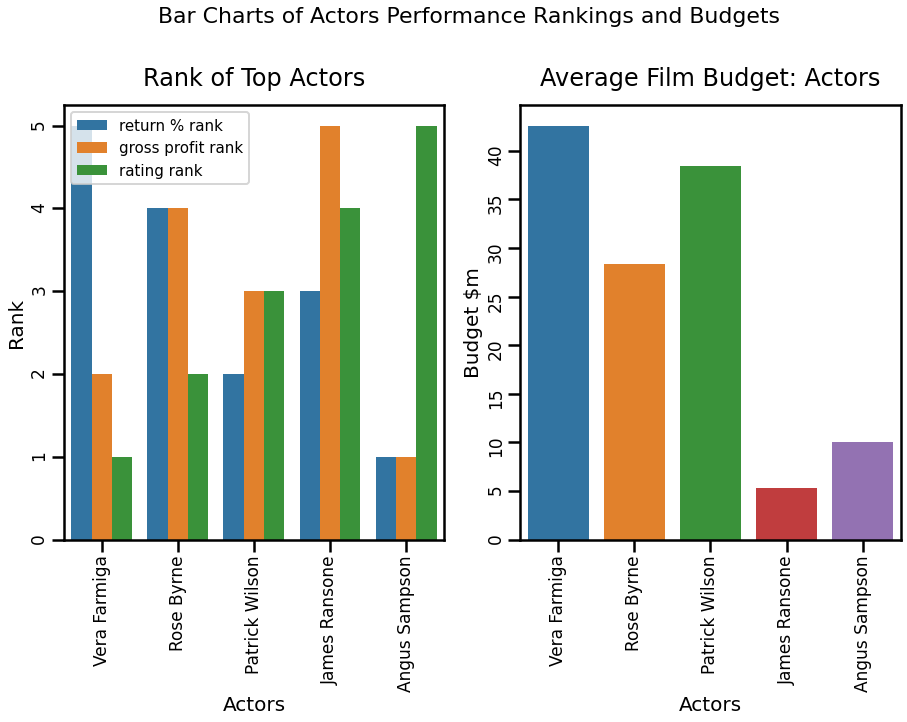

In [33]:
h_actor_chart = viz.graph_generator(h_top_full_crew_df, 'Actor_List', top_h_actors, 'Actors', 'ho')

* <font color='red'> **Angus Sampson has been the best ranked actor in the genre both in terms of profit/loss and ROI, but is the lowest ranked in terms of user ratings.**<br>
* **Vera Farmiga is the best ranked for user ratings, but the lowest for ROI. Rose Byrne is ranked 2nd for user ratings, and 4th for ROI and profit/loss, with Patrick Wilson 2nd for ROI and 3rd for profit/loss and user ratings**<br>
* **Rose Byrne is the only actor who operates around the 25 million budget mark** <font>

### How do the top directors compare in terms of ROI, profitability and user ratings. And what budget are they used to working with?

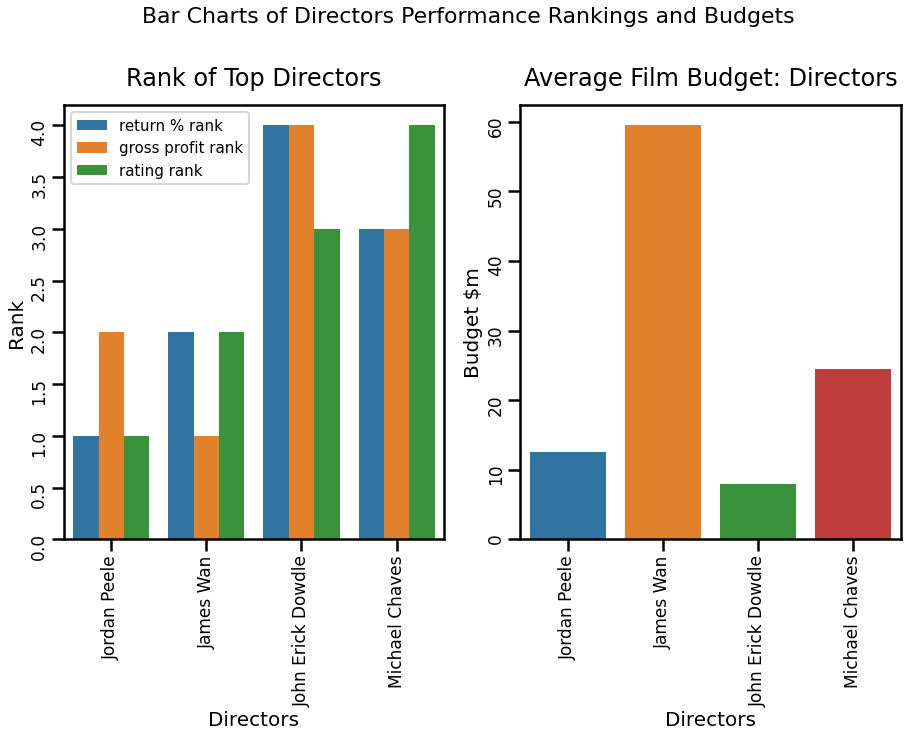

In [34]:
h_director_chart = viz.graph_generator(h_top_full_crew_df, 'Director_List', top_h_directors, 'Directors', 'ho')

* <font color='red'> **Jordan Peele is the best ranked director for ROI and for user ratings and is 2nd ranked for profit/loss**
* **James Wan is best ranked for profit/loss and 2nd ranked for ROI and user ratings**
* **James Wan operates with budgets of around 60 million dollars, and Jordan Peele around 12 million dollars** <font>

### How do the top writers compare in terms of ROI, profitability and user ratings. And what budget are they used to working with?

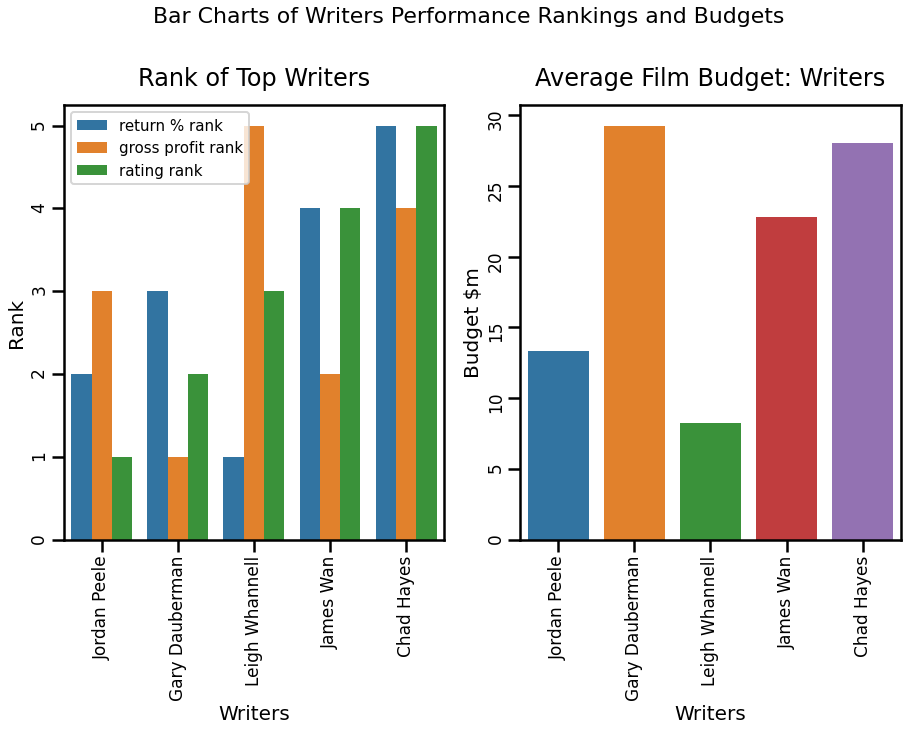

In [35]:
h_writer_chart = viz.graph_generator(h_top_full_crew_df, 'Writer_List', top_h_writers, 'Writers', 'ho')

* <font color='red'> **Jordan Peele is the best ranked writer in terms of user ratings, 2nd in terms of ROI and 3rd in terms of profit/loss**<br>
* **Gary Dauberman id best ranked in terms of profit/loss, 2nd in terms of user ratings and 3rd in terms of ROI.**<br>
* **James Wan, as a writer, operates with budgets of around 22 million dollars, Gary Dauberman around 29 million dollars and Jordan Peele around 12 million dollars**

### How long are the most profitable Horror/Mystery/Thriller movies?

In [60]:
horror_sub_runtime_profit_df = dprep.feature_v_financialMean_df_maker('Run_Time', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_runtime_profit_df = horror_sub_runtime_profit_df.reset_index()
horror_sub_runtime_profit_df = horror_sub_runtime_profit_df.sort_values(by='Run_Time')

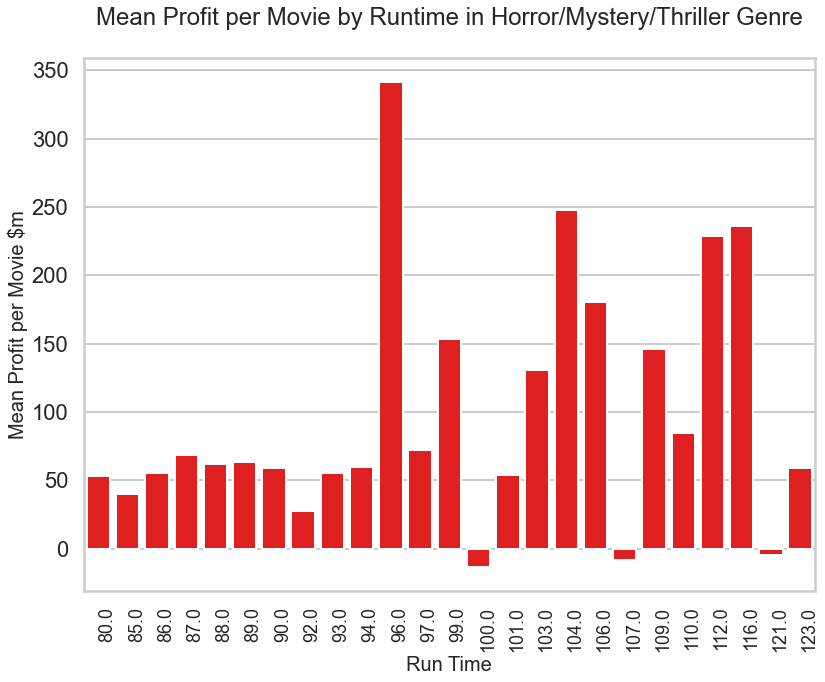

In [61]:
viz.seaborn_bar(horror_sub_runtime_profit_df, 'Run_Time', 'profit_loss_$', 'Run Time', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Runtime in Horror/Mystery/Thriller Genre', 'images/ho_runtime_rank.png', rotation =90);

* <font color='red'> **The most profitable movies in this genre tend to be quite short, at between 96 and 116 mins**

### What months saw the most profitable releases in the genre?

In [62]:
horror_sub_month_profit_df = dprep.feature_v_financialMean_df_maker('release_month', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])

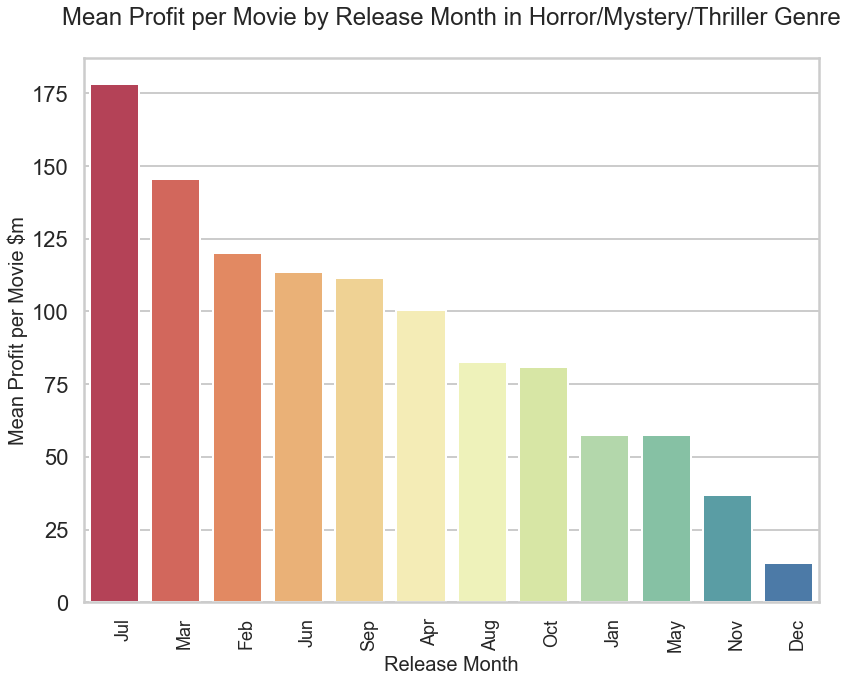

In [63]:
viz.seaborn_bar(horror_sub_month_profit_df, 'release_month', 'profit_loss_$', 'Release Month', 'Mean Profit per Movie $m', 'Mean Profit per Movie by Release Month in Horror/Mystery/Thriller Genre', 'images/ho_month_rank.png', rotation =90);

* <font color='red'> **The most profitable release months for movies in the genre were July, March and February**

### What are the most profitable movies in the genre?

In [64]:
horror_sub_title_profit_df = dprep.feature_v_financialMean_df_maker('title', 'profit_loss_$', financial_attributes_join, genre_filter=['Horror', 'Mystery', 'Thriller'])
horror_sub_title_profit_df = horror_sub_title_profit_df[:20]

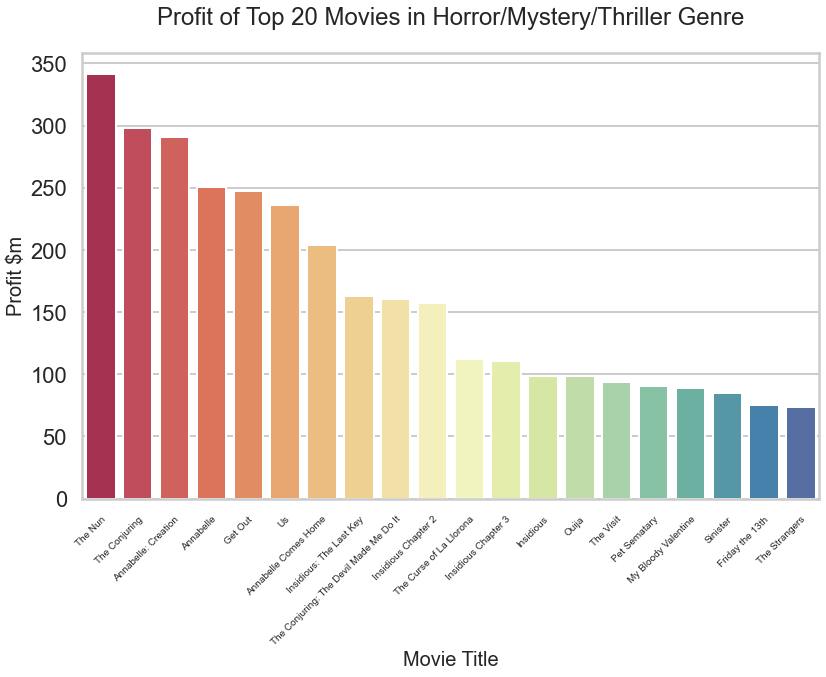

In [65]:
viz.seaborn_bar(horror_sub_title_profit_df, 'title', 'profit_loss_$', 'Movie Title', 'Profit $m', 'Profit of Top 20 Movies in Horror/Mystery/Thriller Genre', 'images/ho_title_rank.png', f=10, rotation =45);

* <font color='red'> **The Nun is the most profitable movie in the genre, followed by the Conjuring, Annabelle, Get Out and Us**<br>
* **Jordan Peele is behind two of the top six movies in the genre**

### What keywords are most associated with profitable Adventure/Sci-Fi/Action movies?

In [8]:
a_text = dprep.omdb_genre_keywords(financial_attributes_hits_join, tmdb_key, ['Adventure', 'Sci-Fi', 'Action'])

In [ ]:
def wordcloud(text, mask_file, save_file):
    text = " ".join(text)
    mask = np.array(Image.open(mask_file))
    wordcloud = WordCloud(background_color="white", width=800, height=400, mask=mask, contour_width=3, min_font_size=12, contour_color='black')
    wordcloud.generate(text)
    wordcloud.to_file(save_file)
    fig, ax = plt.subplots(figsize=(20, 20))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.figure()
    plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
    plt.axis("off")
    plt.show()

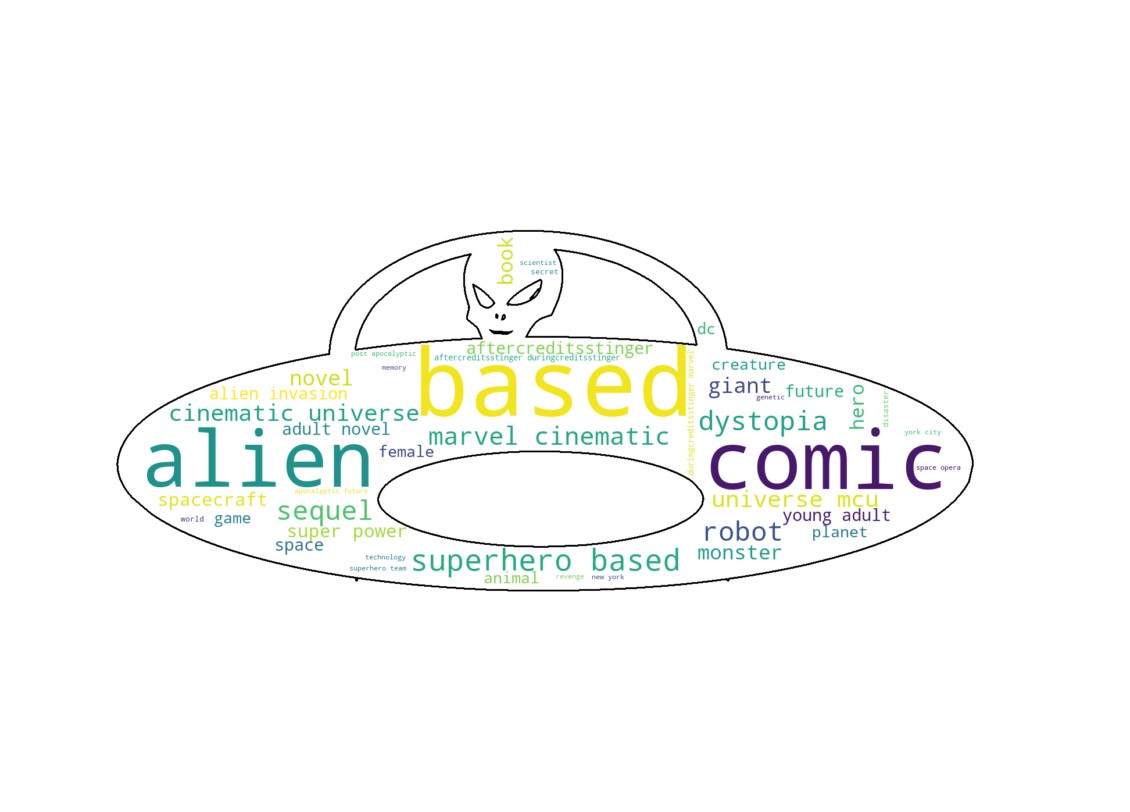

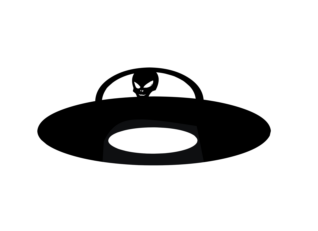

In [9]:
wordcloud(a_text, "images/alien.png", "images/wcalien.png")

### What keywords are most associated with profitable Horror/Mystery/Thriller movies?

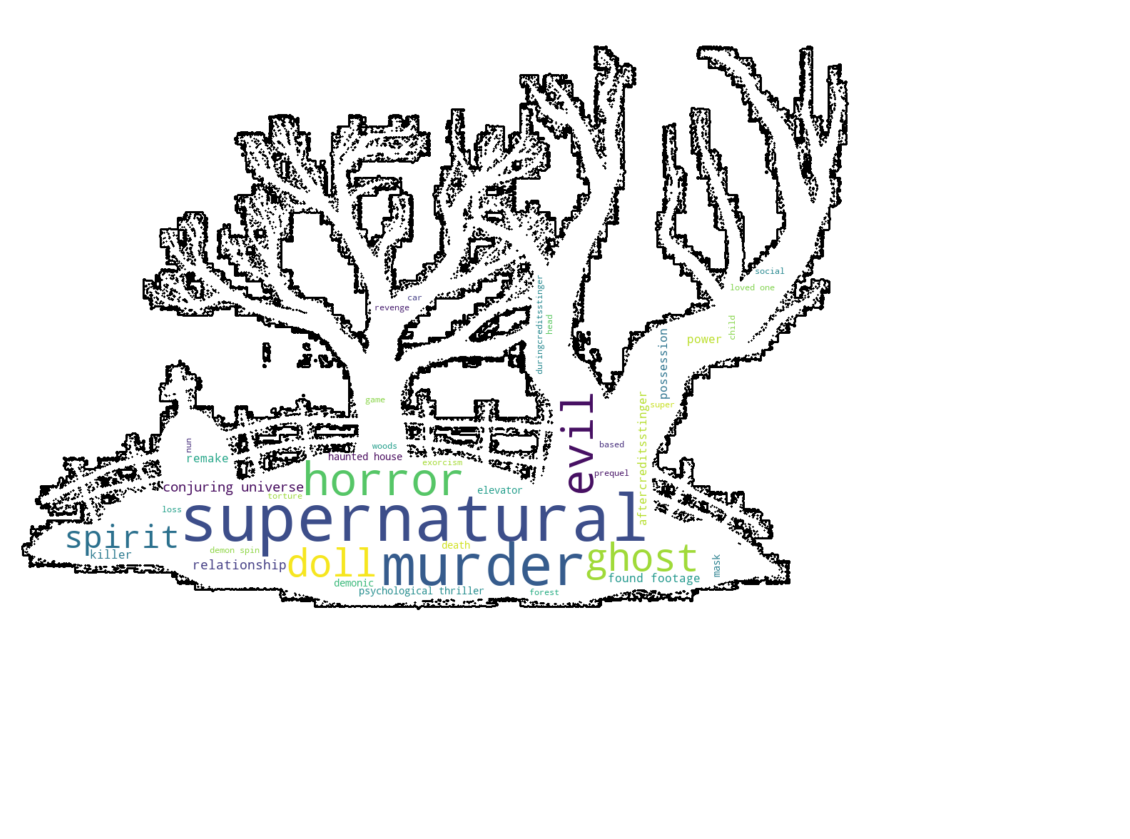

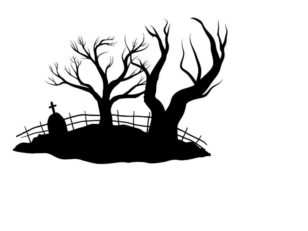

In [10]:
h_text = dprep.omdb_genre_keywords(financial_attributes_hits_join, tmdb_key, ['Horror', 'Mystery', 'Thriller'])
wordcloud(h_text, "images/graveyard.jpg", "images/wcgyard.png")

## Conclusions

This analysis leads to the following recommendations for maximising the chances of producing successful movies:

**General Timing - The first movies should be released until the world's top 10 markets have fully reopened from lockdown** - subject to the pandemic

**High Budget**
* **Genre - The studio's high budget movies should be in the Adventure/Sci-Fi/Action genre**
* **They should have a budget of between 150 and 250 million dollars**
* **The studio should target Mark Ruffalo and/or Bryce Dallas Howard as lead actors**
* **It should target Joss Whedon as director and writer, or JJ Abrams as director**
* **The movies should be over 137 minutes long and be released in April, December, November or June**

**Low Budget**
* **Genre - The studio's low budget movies should be in the Horror/Mystery/Thriller genre**
* **They should have a budget of between 20 and 25 million dollars**
* **The studio should target Rose Byrne and/or Patrick Wilson as lead actors**
* **It should target Jordan Peele as director and writer**
* **The movies should be between 96 and 116 minutes long and be released in July, March and February**


## Next steps

The results show that certain attributes do tend to increase the chances of success, but we would need to do some more analysis to quantify which features have the most weight 

I made the assumption that genre was the most important factor, as that seems intuitive, but a more comprehensive model may show a stronger link between the lead actors or director and success

It is also difficult to quantify the power of an established brand, a lot of the top ranking films are part of a 'universe', such as Marvel or DC, that have decades of recognition to draw on. More data on movies made by studios in similar circumstances would be helpful

Given the movie industry is given to trends, like most creative industries, it is difficult to assert with full confidence that what held true over the last 15 years will continue to do so over the next 15 years

It seems likely that a global event like the pandemic will affected people's tastes, but not necessarily in a predictable way, and we should be gathering as much data as possible now that people are returning to the cinema

We should commission surveys to try and capture the general mood of cinema-goers, something that can't be gleaned from the datasets we worked with

I would only be moderately confident of making these recommendations without these more detailed data